# Analyse results
Here we will analyze the first results of the experiments

## Data Loading
We load the data and merge the  different files. Furthermore, we rename the variables for ansatz, optimizer and featuremap to make the more user friendly.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

from scipy.stats import friedmanchisquare,  wilcoxon, kruskal, mannwhitneyu

sns.set(font_scale=1.25)
sns.set(style='white', palette=None)

In [2]:
declare = True

res = []

for optimizer in ['cobyla', 'spsa', 'neldermead']:
    for preprocessing in ['pca', 'lda']:
        for init in ['uniform', 'normal', 'beta']:
            r = pd.read_csv("../reports/results/covtype___{}_{}_{}_results.csv".format(optimizer, preprocessing, init), index_col=0)
            r['initialization'] = init

            res.append(r)

res = pd.concat(res)
res.head()

accuracy        f1         time   
index                                    
20        0.388  0.400295  2420.290704  \
21        0.416  0.420907  2218.388021   
22        0.372  0.366136  2906.625933   
23        0.340  0.377742  1592.723581   
24        0.188  0.245629  2239.140502   

                                              ansatz   
index                                                  
20     <function get_efficientsu2 at 0x7f12c6ccdee0>  \
21     <function get_efficientsu2 at 0x7f12c6ccdee0>   
22     <function get_efficientsu2 at 0x7f12c6ccdee0>   
23     <function get_efficientsu2 at 0x7f12c6ccdee0>   
24     <function get_efficientsu2 at 0x7f12c6ccdee0>   

                                     optimizer   
index                                            
20     <function get_cobyla at 0x7f12c6ccdf70>  \
21     <function get_cobyla at 0x7f12c6ccdf70>   
22     <function get_cobyla at 0x7f12c6ccdf70>   
23     <function get_cobyla at 0x7f12c6ccdf70>   
24     <function get_cobyla at 0x7f12c6ccdf70>   

                                          featuremap entanglement   
index                                                               
20      <function get_zfeaturemap at 0x7f12f6cde040>         full  \
21      <function get_zfeaturemap at 0x7f12f6cde040>       linear   
22      <function get_zfeaturemap at 0x7f12f6cde040>     circular   
23      <function get_zfeaturemap at 0x7f12f6cde040>          sca   
24     <function get_zzfeaturemap at 0x7f12f6cde0d0>         full   

      entanglement_featuremap  iterations preprocessing initialization  
index                                                                   
20                        NaN         366           pca        uniform  
21                        NaN         382           pca        uniform  
22                        NaN         498           pca        uniform  
23                        NaN         269           pca        uniform  
24                       full         223           pca        uniform

In [3]:
# if ansatz contains 'efficientsu2' replace with 'efficient_su2'
res['ansatz'] = res['ansatz'].apply(lambda x: 'efficient_su2' if 'efficientsu2' in x else x)
# if ansatz = 'paulitwodesign' replace with 'pauli_two_design'
res['ansatz'] = res['ansatz'].apply(lambda x: 'pauli_two_design' if 'paulitwodesign' in x else x)
# if ansatz = 'realamplitudes' replace with 'real_amplitudes'
res['ansatz'] = res['ansatz'].apply(lambda x: 'real_amplitudes' if 'realamplitudes' in x else x)
# if ansatz = 'twolocal' replace with 'two_local'
res['ansatz'] = res['ansatz'].apply(lambda x: 'two_local' if 'twolocal' in x else x)
# otherwise drop
res = res[res['ansatz'].isin(['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'])]

In [4]:
# if optimizer contains 'cobyla' replace with 'cobyla'
res['optimizer'] = res['optimizer'].apply(lambda x: 'cobyla' if 'cobyla' in x else x)
# if optimizer = 'lbfgsb' replace with 'l_bfgs_b'
res['optimizer'] = res['optimizer'].apply(lambda x: 'spsa' if 'spsa' in x else x)
# if optimizer = 'neldermead' replace with 'nelder_mead'
res['optimizer'] = res['optimizer'].apply(lambda x: 'nelder_mead' if 'neldermead' in x else x)

In [5]:
# if feature_map = 'ZZFeatureMap' replace with 'zz'
res['featuremap'] = res['featuremap'].apply(lambda x: 'zz' if 'zzfeaturemap' in x else x)
# if feature_map = 'ZFeatureMap' replace with 'z'
res['featuremap'] = res['featuremap'].apply(lambda x: 'z' if 'zfeaturemap' in x else x)

In [6]:
# consider configurations that are within 10% of the best configuration (accuracy)
best_configs = res[res['accuracy'] > max(res['accuracy']) - 0.1]

worst = res[res['accuracy'] < min(res['accuracy']) + 0.1]

index = ['ansatz', 'featuremap', 'entanglement', 'entanglement_featuremap', 'preprocessing', 'optimizer', 'initialization']

In [7]:
# sort by performance
res = res.sort_values(by=['f1', 'accuracy'], ascending=False).reset_index(drop=True)
res.head()

accuracy        f1         time            ansatz optimizer featuremap   
0     0.612  0.612969  2066.810829     efficient_su2    cobyla         zz  \
1     0.608  0.612726  2097.919316     efficient_su2      spsa         zz   
2     0.612  0.610460   886.946526  pauli_two_design    cobyla         zz   
3     0.616  0.609562  1422.007794   real_amplitudes      spsa          z   
4     0.612  0.605096  2100.127136     efficient_su2      spsa         zz   

  entanglement entanglement_featuremap  iterations preprocessing   
0     circular                  linear         359           lda  \
1       linear                     sca         351           lda   
2          NaN                pairwise         180           lda   
3       linear                     NaN         351           lda   
4     circular                circular         351           lda   

  initialization  
0           beta  
1           beta  
2           beta  
3         normal  
4           beta

In [8]:
res.tail()

accuracy        f1         time           ansatz    optimizer   
1507     0.032  0.024116  3337.319640    efficient_su2  nelder_mead  \
1508     0.044  0.012758  4251.427594  real_amplitudes  nelder_mead   
1509     0.016  0.011808  4236.381172  real_amplitudes  nelder_mead   
1510     0.020  0.006248  4054.202714        two_local  nelder_mead   
1511     0.020  0.002816  2554.172825  real_amplitudes  nelder_mead   

     featuremap entanglement entanglement_featuremap  iterations   
1507          z          sca                     NaN         680  \
1508          z          sca                     NaN         862   
1509          z     circular                     NaN         863   
1510          z     circular                     NaN         847   
1511          z     circular                     NaN         625   

     preprocessing initialization  
1507           lda           beta  
1508           pca           beta  
1509           pca           beta  
1510           pca           beta  
1511           lda           beta

In [9]:
res.groupby(['optimizer', 'initialization'])[['iterations']].mean()

iterations
optimizer   initialization            
cobyla      beta            213.708333
            normal          163.529762
            uniform         162.113095
nelder_mead beta            934.101190
            normal          987.261905
            uniform         537.077381
spsa        beta            351.000000
            normal          351.000000
            uniform         651.000000

## Optimizer
We first consider the optimizer.
* All in all, NelderMead by far the worst
* The three optimizers perform significantly different
* SPSA is significantly better than COBYLA
* But both SPSA and Cobyla are significantly better than Nelder-Mead

In [10]:
res.groupby(['optimizer']).agg({"accuracy":[np.mean, np.std], "f1":[np.mean, np.std]})

accuracy                  f1          
                 mean       std      mean       std
optimizer                                          
cobyla       0.302548  0.143797  0.332040  0.116699
nelder_mead  0.166063  0.052867  0.211089  0.058777
spsa         0.319627  0.138423  0.346251  0.110189

In [11]:
c = res[res['optimizer'] == 'cobyla'].set_index(index).sort_index()
n = res[res['optimizer'] == 'nelder_mead'].set_index(index).sort_index()
s = res[res['optimizer'] == 'spsa'].set_index(index).sort_index()

In [12]:
# Friedman test
print("Friedman: significantly different: ", friedmanchisquare(c['accuracy'], n['accuracy'], s['accuracy']).pvalue < 0.05)
# Wilcoxon
print("Wilcoxon: SPSA significantly better than COBYLA:", wilcoxon(s['accuracy'], c['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: Cobyla significantly better than Nelder-Mead:", wilcoxon(c['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: SPSA significantly better than Nelder-Mead:", wilcoxon(s['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)

Friedman: significantly different:  True
Wilcoxon: SPSA significantly better than COBYLA: True
Wilcoxon: Cobyla significantly better than Nelder-Mead: True
Wilcoxon: SPSA significantly better than Nelder-Mead: True


In [13]:
best_configs.value_counts(['optimizer'])

optimizer
spsa         72
cobyla       62
Name: count, dtype: int64

## Ansatz
We now consider the ansatz parameter alone.
* Pauli Two Design: slightly worse performance in mean, but not significant
* Although best Pauli ocnfig is in place 3, a lot less are within the best configurations
* The ansatzes do not perform significantly different

In [14]:
# get first row and first row where ansatz =='pauli'
pd.concat([res.iloc[0:2, :].T, res[res['ansatz'] == 'pauli_two_design'].iloc[0]], axis=1).T

accuracy        f1         time            ansatz optimizer featuremap   
0    0.612  0.612969  2066.810829     efficient_su2    cobyla         zz  \
1    0.608  0.612726  2097.919316     efficient_su2      spsa         zz   
2    0.612   0.61046   886.946526  pauli_two_design    cobyla         zz   

  entanglement entanglement_featuremap iterations preprocessing initialization  
0     circular                  linear        359           lda           beta  
1       linear                     sca        351           lda           beta  
2          NaN                pairwise        180           lda           beta

In [15]:
res.groupby(['ansatz']).agg({"accuracy":[np.mean, np.std, np.min, np.max], "f1":[np.mean, np.std]})

accuracy                                f1          
                      mean       std   amin   amax      mean       std
ansatz                                                                
efficient_su2     0.261787  0.142452  0.032  0.612  0.295347  0.119003
pauli_two_design  0.246148  0.124184  0.048  0.612  0.281635  0.108685
real_amplitudes   0.262250  0.137927  0.016  0.616  0.295506  0.117412
two_local         0.267230  0.135855  0.020  0.620  0.301079  0.113230

In [16]:
e = res[res['ansatz'] == 'efficient_su2']['accuracy']
p = res[res['ansatz'] == 'pauli_two_design']['accuracy']
r = res[res['ansatz'] == 'real_amplitudes']['accuracy']
t = res[res['ansatz'] == 'two_local']['accuracy']

In [17]:
# kruskal test as they are not paired
print("Ansatzes significantly different: ", kruskal(e, p, r, t).pvalue < 0.05)

Ansatzes significantly different:  False


In [18]:
best_configs.value_counts(['ansatz'], dropna=False).sort_index()

ansatz          
efficient_su2       40
pauli_two_design     4
real_amplitudes     35
two_local           55
Name: count, dtype: int64

## Ansatz Entanglement
* Hardly any big difference in mean
* Significance test shows no significant difference

In [19]:
res.groupby(['entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                  mean median       std      mean    median       std
entanglement                                                         
circular      0.260160  0.200  0.140995  0.295152  0.260060  0.120000
full          0.270593  0.208  0.136502  0.303204  0.262349  0.113606
linear        0.258679  0.202  0.141432  0.291295  0.262039  0.118058
pairwise      0.272926  0.226  0.135996  0.306672  0.272446  0.112569
sca           0.263691  0.208  0.136140  0.297727  0.261755  0.114774

In [20]:
c = res[res['entanglement'] == 'circular']['accuracy']
f = res[res['entanglement'] == 'full']['accuracy']
l = res[res['entanglement'] == 'linear']['accuracy']
p = res[res['entanglement'] == 'pairwise']['accuracy']
s = res[res['entanglement'] == 'sca']['accuracy']

In [21]:
# kruskal test as not paired
print("Entanglement significantly different:", kruskal(c,f,l,p,s).pvalue < 0.05)

Entanglement significantly different: False


In [22]:
best_configs.value_counts(['entanglement'], dropna=False).sort_index()

entanglement
circular        34
full            30
linear          26
pairwise        13
sca             27
NaN              4
Name: count, dtype: int64

## Ansatz combined with ansatz entanglement
* In mean, does not show too much.
* Significance test shows that there are no significant differences in entanglement for any ansatz

In [23]:
res.groupby(['ansatz', 'entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                  mean median       std      mean    median   
ansatz          entanglement                                                  
efficient_su2   circular      0.257778  0.192  0.144216  0.292271  0.257632  \
                full          0.267926  0.202  0.141678  0.301179  0.258766   
                linear        0.258407  0.200  0.142213  0.293408  0.254546   
                sca           0.263037  0.198  0.143444  0.294530  0.255398   
real_amplitudes circular      0.261444  0.204  0.139984  0.296566  0.265358   
                full          0.268630  0.210  0.138096  0.301293  0.263070   
                linear        0.255296  0.206  0.139855  0.284936  0.269924   
                sca           0.263630  0.212  0.135318  0.299228  0.268495   
two_local       circular      0.261259  0.204  0.140028  0.296619  0.260975   
                full          0.275222  0.212  0.130655  0.307140  0.265934   
                linear        0.262333  0.204  0.143436  0.295540  0.262700   
                pairwise      0.272926  0.226  0.135996  0.306672  0.272446   
                sca           0.264407  0.206  0.130616  0.299424  0.261362   

                                        
                                   std  
ansatz          entanglement            
efficient_su2   circular      0.123758  
                full          0.117176  
                linear        0.116256  
                sca           0.120142  
real_amplitudes circular      0.118937  
                full          0.116877  
                linear        0.118074  
                sca           0.116703  
two_local       circular      0.118299  
                full          0.107454  
                linear        0.120635  
                pairwise      0.112569  
                sca           0.108148

In [24]:
for ansatz in ['efficient_su2', 'real_amplitudes', 'two_local']:
    e = res[res['ansatz']==ansatz]
    e_c = e[e['entanglement'] == 'circular'].set_index(index).sort_index()['accuracy']
    e_f = e[e['entanglement'] == 'full'].set_index(index).sort_index()['accuracy']
    e_l = e[e['entanglement'] == 'linear'].set_index(index).sort_index()['accuracy']
    e_s = e[e['entanglement'] == 'sca'].set_index(index).sort_index()['accuracy']

    if ansatz == 'two_local':
        e_p = e[e['entanglement'] == 'pairwise'].set_index(index).sort_index()['accuracy']
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s, e_p).pvalue < 0.05)
    else:
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s).pvalue < 0.05)

efficient_su2 significantly different entanglement: False
real_amplitudes significantly different entanglement: False
two_local significantly different entanglement: False


In [25]:
best_configs.value_counts(['ansatz', 'entanglement'], dropna=False).sort_index()

ansatz            entanglement
efficient_su2     circular        11
                  full            10
                  linear           9
                  sca             10
pauli_two_design  NaN              4
real_amplitudes   circular        11
                  full            11
                  linear           6
                  sca              7
two_local         circular        12
                  full             9
                  linear          11
                  pairwise        13
                  sca             10
Name: count, dtype: int64

## Feature Map
* ZFeatureMap is significantly better than ZZFeatureMap, but best configs almost all use ZZ because ZZ with beta is so much better
* But, ZZFeatureMap performs very good with beta initialization

In [26]:
res.groupby(['featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1                    
                mean median       std      mean    median       std
featuremap                                                         
z           0.363952  0.414  0.168392  0.350054  0.374794  0.143465
zz          0.242505  0.196  0.120793  0.285741  0.253847  0.106281

In [27]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                               mean median       std      mean    median   
featuremap initialization                                                  
z          beta            0.389810  0.478  0.180236  0.319658  0.348268  \
           normal          0.350048  0.398  0.163474  0.362989  0.392519   
           uniform         0.352000  0.382  0.159765  0.367514  0.387517   
zz         beta            0.348781  0.348  0.156439  0.371510  0.375027   
           normal          0.188029  0.188  0.033867  0.241972  0.240487   
           uniform         0.190705  0.188  0.035167  0.243742  0.242768   

                                     
                                std  
featuremap initialization            
z          beta            0.141252  
           normal          0.144427  
           uniform         0.141488  
zz         beta            0.141285  
           normal          0.038114  
           uniform         0.038265

In [28]:
z = res[res['featuremap'] == 'z']['accuracy']
zz = res[res['featuremap'] == 'zz']['accuracy']

In [29]:
print("Z significantly better than ZZFeatureMap:", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

Z significantly better than ZZFeatureMap: True


In [30]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()

featuremap
z             45
zz            89
Name: count, dtype: int64

## Feature Entanglement
* linear outperforms all but pairwise significantly, pairwise outperforms full
* Notably, full is a lot less represented among the best ones

In [31]:
res.groupby(['entanglement_featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                             mean median       std      mean    median   
entanglement_featuremap                                                  
circular                 0.236571  0.194  0.120432  0.279710  0.248194  \
full                     0.228413  0.192  0.099229  0.276580  0.249044   
linear                   0.255429  0.212  0.123906  0.297438  0.271993   
pairwise                 0.252921  0.204  0.132194  0.291166  0.258962   
sca                      0.239190  0.192  0.124447  0.283812  0.250552   

                                   
                              std  
entanglement_featuremap            
circular                 0.106782  
full                     0.088951  
linear                   0.106164  
pairwise                 0.114659  
sca                      0.112404

In [32]:
c = res[res['entanglement_featuremap'] == 'circular']['accuracy']
f = res[res['entanglement_featuremap'] == 'full']['accuracy']
l = res[res['entanglement_featuremap'] == 'linear']['accuracy']
p = res[res['entanglement_featuremap'] == 'pairwise']['accuracy']
s = res[res['entanglement_featuremap'] == 'sca']['accuracy']

print('Entanglement significantly different:', kruskal(c,f,l,p,s).pvalue < 0.05)

for ent in ['circular', 'full', 'linear', 'pairwise', 'sca']:
    e = res[res['entanglement_featuremap'] == ent]
    for ent2 in ['circular', 'full', 'linear', 'pairwise', 'sca']:
        if ent != ent2:
            e2 = res[res['entanglement_featuremap'] == ent2]
            sign = mannwhitneyu(e['accuracy'], e2['accuracy'], alternative='greater').pvalue < 0.05
            if sign:
                print(f"{ent} significantly different than {ent2}:", mannwhitneyu(e['accuracy'], e2['accuracy'], alternative='greater').pvalue < 0.05)

Entanglement significantly different: True
linear significantly different than circular: True
linear significantly different than full: True
linear significantly different than sca: True
pairwise significantly different than full: True


In [33]:
best_configs.value_counts(['entanglement_featuremap'], dropna=False).sort_index()

entanglement_featuremap
circular                   15
full                        5
linear                     21
pairwise                   28
sca                        20
NaN                        45
Name: count, dtype: int64

## Ansatz and feature map
* Results do not differ too much - ZFeatureMap is significantly better than ZZFeatureMap for all ansatzes

In [34]:
res.groupby(['ansatz', 'featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                         f1             
                                 mean median       std      mean    median   
ansatz           featuremap                                                  
efficient_su2    z           0.368667  0.420  0.162593  0.350971  0.381887  \
                 zz          0.240411  0.192  0.128003  0.284222  0.250943   
pauli_two_design z           0.339333  0.360  0.122448  0.342460  0.373012   
                 zz          0.227511  0.182  0.116488  0.269470  0.238089   
real_amplitudes  z           0.355667  0.434  0.182289  0.339775  0.372638   
                 zz          0.243567  0.200  0.119026  0.286652  0.257839   
two_local        z           0.371733  0.418  0.171026  0.359061  0.382830   
                 zz          0.246329  0.202  0.117182  0.289482  0.259595   

                                       
                                  std  
ansatz           featuremap            
efficient_su2    z           0.133437  
                 zz          0.112854  
pauli_two_design z           0.092344  
                 zz          0.108049  
real_amplitudes  z           0.160641  
                 zz          0.104763  
two_local        z           0.146449  
                 zz          0.101641

In [35]:
for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    f = res[res['ansatz'] == ansatz]
    z = f[f['featuremap'] == 'z'].set_index(index).sort_index()['accuracy']
    zz = f[f['featuremap'] == 'zz'].set_index(index).sort_index()['accuracy']

    print(f"{ansatz}: Z significantly better than ZZ", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

efficient_su2: Z significantly better than ZZ True
pauli_two_design: Z significantly better than ZZ True
real_amplitudes: Z significantly better than ZZ True
two_local: Z significantly better than ZZ True


In [36]:
best_configs.value_counts(['ansatz', 'featuremap'], dropna=False).sort_index()

ansatz            featuremap
efficient_su2     z             12
                  zz            28
pauli_two_design  zz             4
real_amplitudes   z             12
                  zz            23
two_local         z             21
                  zz            34
Name: count, dtype: int64

## Preprocessing
* LDA significantly better than PCA

In [37]:
res.groupby(['preprocessing']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                   mean       std      mean       std
preprocessing                                        
lda            0.282915  0.165495  0.312004  0.142567
pca            0.242577  0.098273  0.280916  0.077587

In [38]:
p = res[res['preprocessing']=='pca'].set_index(index).sort_index()['accuracy']
l = res[res['preprocessing']=='lda'].set_index(index).sort_index()['accuracy']

In [39]:
print("LDA significantly better than PCA: ", wilcoxon(l, p, alternative='greater').pvalue < 0.05)

LDA significantly better than PCA:  True


In [40]:
best_configs.value_counts(['preprocessing'], dropna=False)

preprocessing
lda              132
pca                2
Name: count, dtype: int64

## Initialization
* Beta works better in mean but also has higher std
* Beta init really improves lda results
* Beta also really improves SPSA and COBYLA results, not too much for Nelder-Mead

In [41]:
res.groupby(['initialization'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                    mean       std      mean       std
initialization                                        
beta            0.355619  0.161185  0.362868  0.142459
normal          0.215032  0.094964  0.262141  0.081793
uniform         0.217587  0.094141  0.264370  0.081578

In [42]:
b = res[res['initialization']=='beta'].set_index(index).sort_index()['accuracy']
r = res[res['initialization']=='uniform'].set_index(index).sort_index()['accuracy']
n = res[res['initialization']=='normal'].set_index(index).sort_index()['accuracy']

In [43]:
print("Significant Differences:", friedmanchisquare(b,r,n).pvalue < 0.05)
print("Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
print("Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
print("Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

Significant Differences: True
Beta significantly better than Uniform: True
Beta significantly better than Normal: True
Normal and Uniform significantly different: False


In [44]:
best_configs.value_counts(['initialization'], dropna=False)

initialization
beta              104
uniform            18
normal             12
Name: count, dtype: int64

### Intialization X Optimizer
Significant differences for COBYLA and SPSA, but not for Nelder-Mead.

In [45]:
res.groupby(['optimizer', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                mean       std      mean       std
optimizer   initialization                                        
cobyla      beta            0.445048  0.103438  0.441405  0.090770
            normal          0.232881  0.102524  0.278653  0.085339
            uniform         0.229714  0.102092  0.276062  0.086287
nelder_mead beta            0.170429  0.080201  0.204700  0.086245
            normal          0.160976  0.030756  0.211620  0.038435
            uniform         0.166786  0.031532  0.216948  0.037605
spsa        beta            0.451381  0.096697  0.442499  0.087739
            normal          0.251238  0.105484  0.296152  0.085936
            uniform         0.256262  0.105014  0.300101  0.086607

In [46]:
for optimizer in pd.unique(res['optimizer']):
    res_opt = res[res['optimizer'] == optimizer]
    n = res_opt[res_opt['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_opt[res_opt['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_opt[res_opt['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{optimizer}: Significant Differences:", sign)
    if sign:
        print(f"{optimizer}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)


cobyla: Significant Differences: True
cobyla: Beta significantly better than Uniform: True
cobyla: Beta significantly better than Normal: True
cobyla: Normal and Uniform significantly different: False
spsa: Significant Differences: True
spsa: Beta significantly better than Uniform: True
spsa: Beta significantly better than Normal: True
spsa: Normal and Uniform significantly different: False
nelder_mead: Significant Differences: False


### Initialization X Ansatz
Significant differences for all ansatzes. Beta outperforms both others on all ansatzes, no significant differences between normal and uniform otherwise.

In [47]:
res.groupby(['ansatz', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                     mean       std      mean       std
ansatz           initialization                                        
efficient_su2    beta            0.358194  0.169432  0.363438  0.149893
                 normal          0.209750  0.093074  0.258191  0.078667
                 uniform         0.217417  0.098604  0.264412  0.083691
pauli_two_design beta            0.346889  0.147731  0.355630  0.134990
                 normal          0.195222  0.079027  0.242810  0.074631
                 uniform         0.196333  0.058463  0.246464  0.062173
real_amplitudes  beta            0.351861  0.161779  0.358653  0.145646
                 normal          0.216000  0.100505  0.262671  0.087331
                 uniform         0.218889  0.094500  0.265193  0.081756
two_local        beta            0.358311  0.157664  0.367232  0.136109
                 normal          0.222444  0.094726  0.268745  0.080884
                 uniform         0.220933  0.096077  0.267260  0.083284

In [48]:
for ansatz in pd.unique(res['ansatz']):
    res_ans = res[res['ansatz'] == ansatz]
    n = res_ans[res_ans['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ans[res_ans['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ans[res_ans['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ansatz}: Significant Differences:", sign)
    if sign:
        print(f"{ansatz}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

efficient_su2: Significant Differences: True
efficient_su2: Beta significantly better than Uniform: True
efficient_su2: Beta significantly better than Normal: True
efficient_su2: Normal and Uniform significantly different: False
pauli_two_design: Significant Differences: True
pauli_two_design: Beta significantly better than Uniform: True
pauli_two_design: Beta significantly better than Normal: True
pauli_two_design: Normal and Uniform significantly different: False
real_amplitudes: Significant Differences: True
real_amplitudes: Beta significantly better than Uniform: True
real_amplitudes: Beta significantly better than Normal: True
real_amplitudes: Normal and Uniform significantly different: False
two_local: Significant Differences: True
two_local: Beta significantly better than Uniform: True
two_local: Beta significantly better than Normal: True
two_local: Normal and Uniform significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X Ansatz Entanglement
Significant differences for all entanglement strategies. Beta outperforms bot hohters on all strategies significantly, no difference between uniform and normal for any strategy.

In [49]:
res.groupby(['entanglement', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                 mean       std      mean       std
entanglement initialization                                        
circular     beta            0.352852  0.169097  0.361782  0.151279
             normal          0.208407  0.090581  0.256150  0.079348
             uniform         0.219222  0.100721  0.267523  0.086607
full         beta            0.371074  0.151568  0.378022  0.133466
             normal          0.218852  0.099523  0.264802  0.082173
             uniform         0.221852  0.089879  0.266788  0.076926
linear       beta            0.347593  0.167291  0.351325  0.146046
             normal          0.214963  0.102765  0.261749  0.089655
             uniform         0.213481  0.099326  0.260810  0.085144
pairwise     beta            0.362778  0.154250  0.370593  0.131379
             normal          0.229889  0.100592  0.276513  0.087101
             uniform         0.226111  0.100829  0.272911  0.087074
sca          beta            0.351481  0.165183  0.360181  0.146137
             normal          0.219556  0.089917  0.267517  0.076105
             uniform         0.220037  0.094391  0.265483  0.081912

In [50]:
for entanglement in pd.unique(res['entanglement']):
    if entanglement is np.nan:
        continue
    res_ent = res[res['entanglement'] == entanglement]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{entanglement}: Significant Differences:", sign)
    if sign:
        print(f"{entanglement}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: True
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False


/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X FeatureMap
Beta significantly better for both feature maps. No significant differences for uniform and normal otherwise.

In [51]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                               mean       std      mean       std
featuremap initialization                                        
z          beta            0.389810  0.180236  0.319658  0.141252
           normal          0.350048  0.163474  0.362989  0.144427
           uniform         0.352000  0.159765  0.367514  0.141488
zz         beta            0.348781  0.156439  0.371510  0.141285
           normal          0.188029  0.033867  0.241972  0.038114
           uniform         0.190705  0.035167  0.243742  0.038265

In [52]:
for featmap in pd.unique(res['featuremap']):
    res_fm = res[res['featuremap'] == featmap]
    n = res_fm[res_fm['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_fm[res_fm['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_fm[res_fm['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{featmap}: Significant Differences:", sign)
    if sign:
        print(f"{featmap}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

zz: Significant Differences: True
zz: Beta significantly better than Uniform: True
zz: Beta significantly better than Normal: True
zz: Normal and Uniform significantly different: False
z: Significant Differences: True
z: Beta significantly better than Uniform: True
z: Beta significantly better than Normal: True
z: Normal and Uniform significantly different: False


### Initialization X FeatureMap Entanglement
Beta outperforms all others on all entanglement strategies. No significant differences between normal and uniform on any other task.

In [53]:
res.groupby(['entanglement_featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                            mean       std      mean       std
entanglement_featuremap initialization                                        
circular                beta            0.341476  0.158542  0.363776  0.145058
                        normal          0.181714  0.029780  0.235764  0.034287
                        uniform         0.186524  0.033477  0.239590  0.039094
full                    beta            0.319619  0.125332  0.355112  0.112386
                        normal          0.185762  0.026731  0.241379  0.031787
                        uniform         0.179857  0.026609  0.233249  0.029842
linear                  beta            0.365619  0.158189  0.382654  0.139793
                        normal          0.196857  0.038261  0.252310  0.042858
                        uniform         0.203810  0.038517  0.257351  0.040848
pairwise                beta            0.371238  0.168454  0.383962  0.152295
                        normal          0.192190  0.039593  0.242978  0.042641
                        uniform         0.195333  0.040569  0.246557  0.040818
sca                     beta            0.345952  0.166073  0.372047  0.154097
                        normal          0.183619  0.031555  0.237427  0.036374
                        uniform         0.188000  0.030747  0.241961  0.036201

In [54]:
for ent in pd.unique(res['entanglement_featuremap']):
    if ent is np.nan:
        continue
    res_ent = res[res['entanglement_featuremap'] == ent]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ent}: Significant Differences:", sign)
    if sign:
        print(f"{ent}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False

### Initialization X Preprocessing
Significant differences for both preprocessing techniques. Beta outperforms both others for both methods, no significant differences between the others. But Beta peforms a lot better on LDA data than PCA (10\% in mean!).

In [55]:
res.groupby(['preprocessing', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                  mean       std      mean       std
preprocessing initialization                                        
lda           beta            0.403873  0.189266  0.398979  0.176204
              normal          0.222873  0.110148  0.270014  0.096185
              uniform         0.222000  0.111335  0.267017  0.097170
pca           beta            0.307365  0.107554  0.326757  0.083687
              normal          0.207190  0.076264  0.254268  0.063490
              uniform         0.213175  0.072979  0.261724  0.062292

In [56]:
for preprocessing in pd.unique(res['preprocessing']):
    res_pre = res[res['preprocessing'] == preprocessing]
    n = res_pre[res_pre['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_pre[res_pre['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_pre[res_pre['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{preprocessing}: Significant Differences:", sign)
    if sign:
        print(f"{preprocessing}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

lda: Significant Differences: True
lda: Beta significantly better than Uniform: True
lda: Beta significantly better than Normal: True
lda: Normal and Uniform significantly different: False
pca: Significant Differences: True
pca: Beta significantly better than Uniform: True
pca: Beta significantly better than Normal: True
pca: Normal and Uniform significantly different: True


## Plot the Results

In [57]:
res_better = res

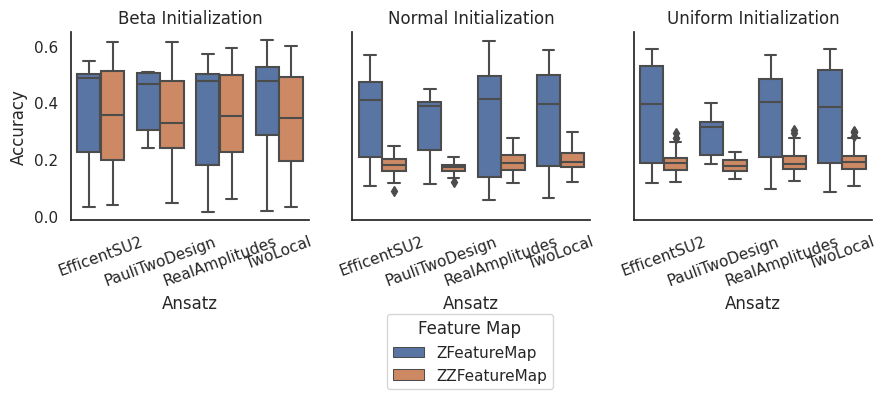

In [58]:
r = res.copy()
r['initialization'] = r['initialization'].apply(lambda x: x.capitalize())
r['optimizer'] = r['optimizer'].apply(lambda x: 'Nelder-Mead' if x == 'nelder_mead' else 'COBYLA' if x == 'cobyla' else 'SPSA')
g = sns.FacetGrid(r, col='initialization', sharex=True, sharey=True)
g.map_dataframe(sns.boxplot, x='ansatz', y='accuracy', hue='featuremap', palette='deep', order=['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'], hue_order=['z', 'zz'])
g.set_xticklabels(['EfficentSU2', 'PauliTwoDesign', 'RealAmplitudes', 'TwoLocal'], rotation=20)
g.set_titles(col_template="{col_name} Initialization")
g.set_xlabels("Ansatz")
g.set_ylabels("Accuracy")
g.add_legend(bbox_to_anchor=(0.57, -0.2), title='Feature Map', frameon=1)
l = g.legend
for t in l.texts:
    if t.get_text() == 'z':
        t.set_text("ZFeatureMap")
    else:
        t.set_text("ZZFeatureMap")
plt.savefig('../reports/figures/covtype_initialization_ansatz_featuremap.png', bbox_inches='tight')

<Axes: xlabel='optimizer', ylabel='accuracy'>

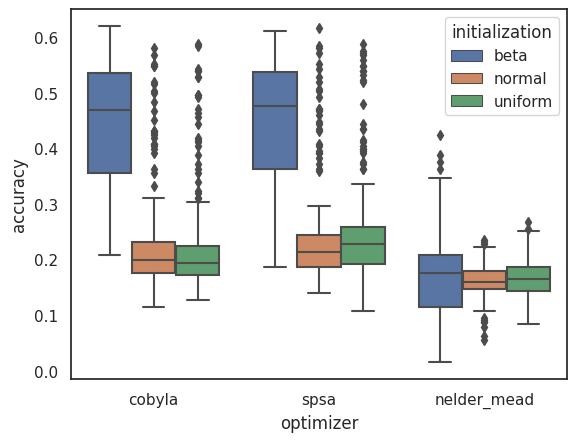

In [59]:
sns.boxplot(res, x='optimizer', y='accuracy', hue='initialization')

### Time X Optimizer and Initialization

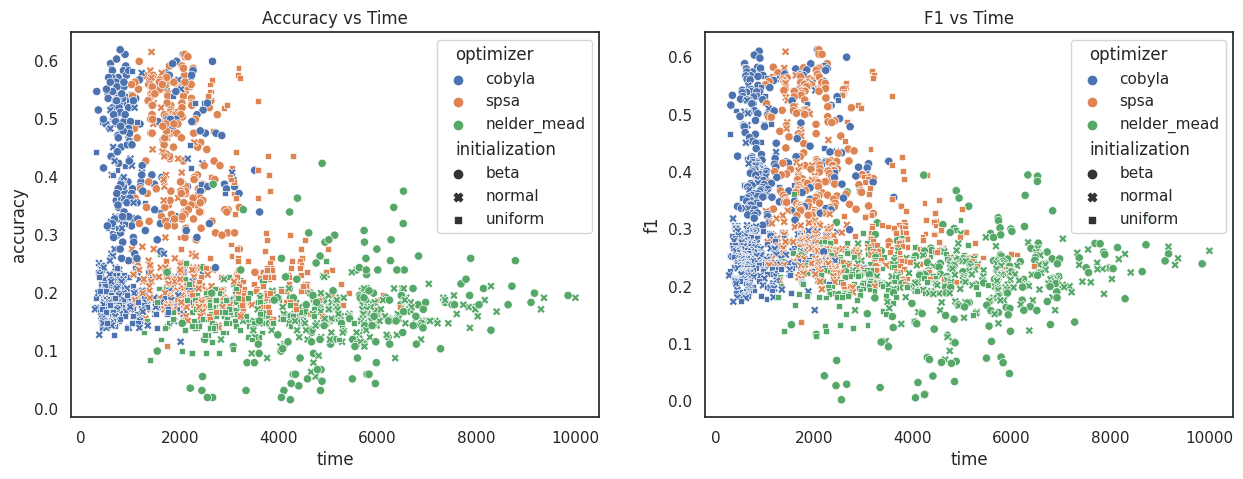

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='optimizer', style='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='optimizer', style='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [61]:
cob_runtime = res[res['optimizer']=='cobyla'].set_index(index).sort_index()['time']
spsa_runtime = res[res['optimizer']=='spsa'].set_index(index).sort_index()['time']
nelder_runtime = res[res['optimizer']=='nelder_mead'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", kruskal(cob_runtime, spsa_runtime, nelder_runtime).pvalue < 0.05)

print("COBYLA significantly shorter than SPSA", wilcoxon(cob_runtime, spsa_runtime, alternative='less').pvalue < 0.05)
print("COBYLA significantly shorter than Nelder-Mead", wilcoxon(cob_runtime, nelder_runtime, alternative='less').pvalue < 0.05)
print("SPSA significantly shorter than Nelder-Mead", wilcoxon(spsa_runtime, nelder_runtime, alternative='less').pvalue < 0.05)

Significant Differences: True
COBYLA significantly shorter than SPSA True
COBYLA significantly shorter than Nelder-Mead True
SPSA significantly shorter than Nelder-Mead True


### Ansatz

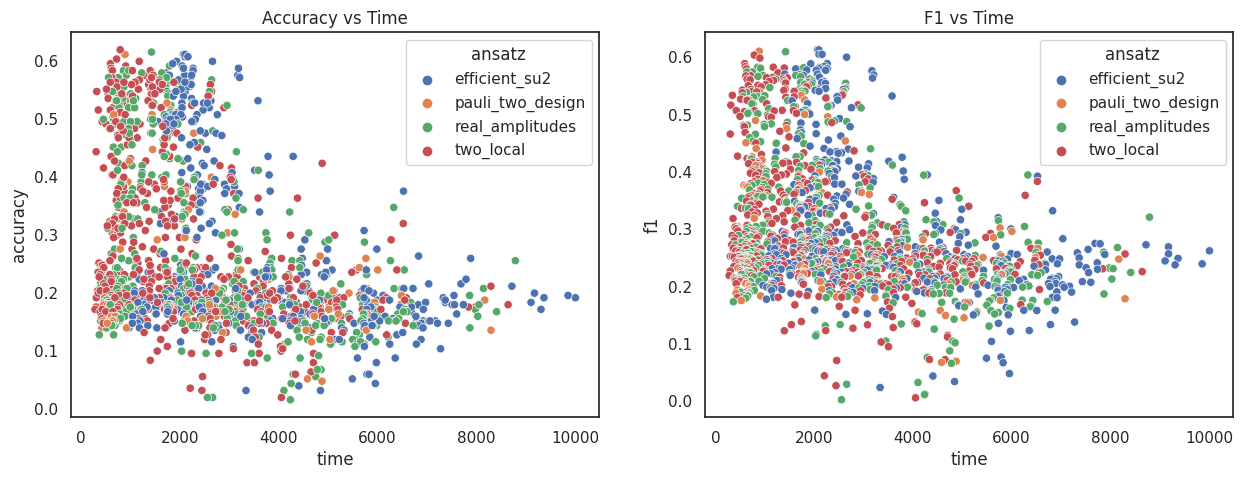

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='ansatz', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='ansatz', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [63]:
eff_runtime = res[res['ansatz']=='efficient_su2']['time']
pauli_runtime = res[res['ansatz']=='pauli_two_design']['time']
real_runtime = res[res['ansatz']=='real_amplitudes']['time']
two_runtime = res[res['ansatz']=='two_local']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(eff_runtime, pauli_runtime, real_runtime, two_runtime).pvalue < 0.05)

for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    for ansatz2 in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
        if ansatz != ansatz2:
            sign = mannwhitneyu(res[res['ansatz']==ansatz]['time'], res[res['ansatz']==ansatz2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{ansatz}: significantly shorter than {ansatz2}", sign)

Significant Differences: True
pauli_two_design: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than efficient_su2 True
two_local: significantly shorter than efficient_su2 True
two_local: significantly shorter than pauli_two_design True
two_local: significantly shorter than real_amplitudes True


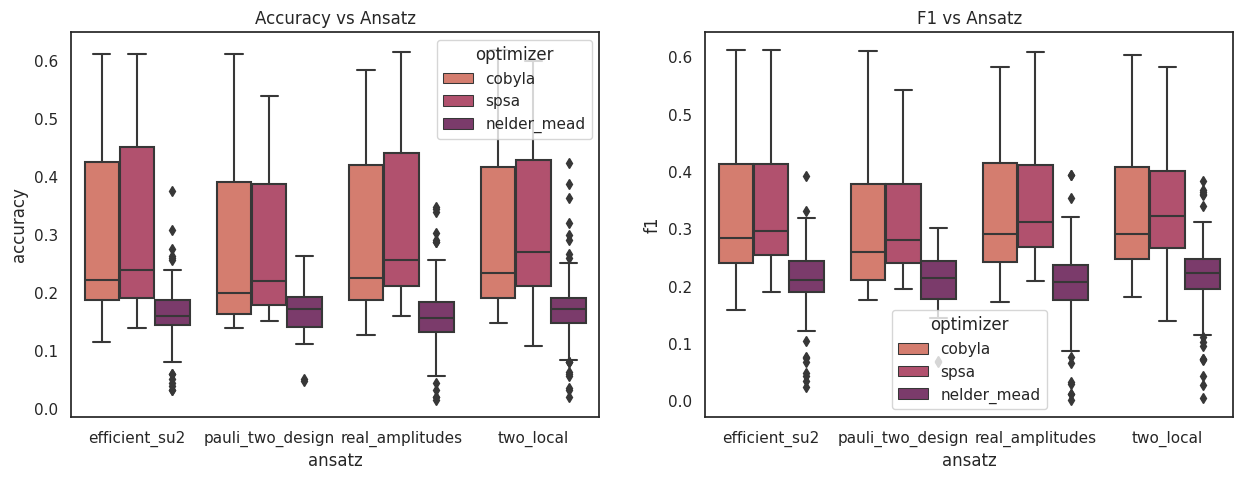

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

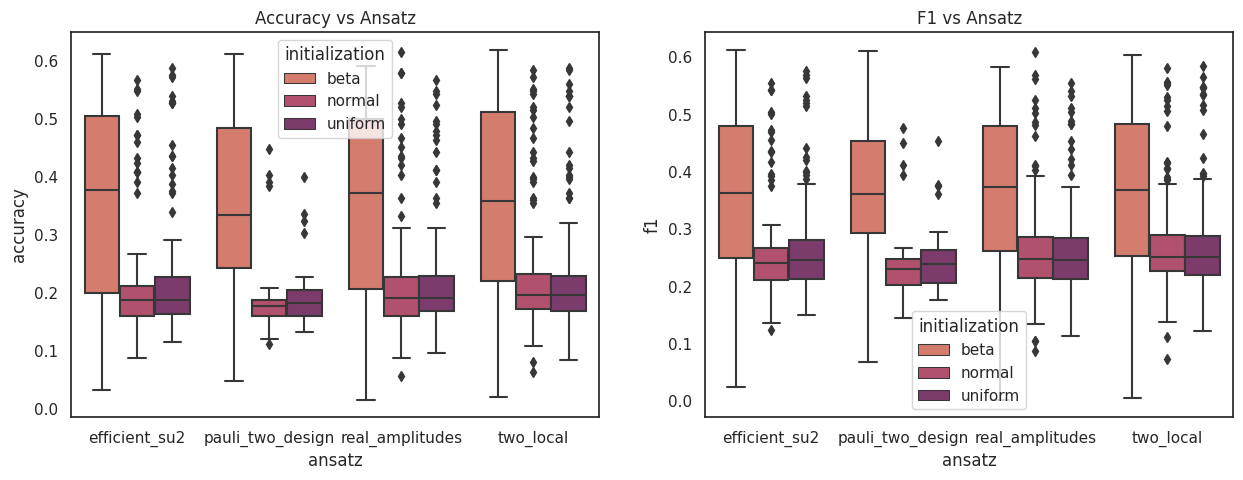

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

### FeatureMap

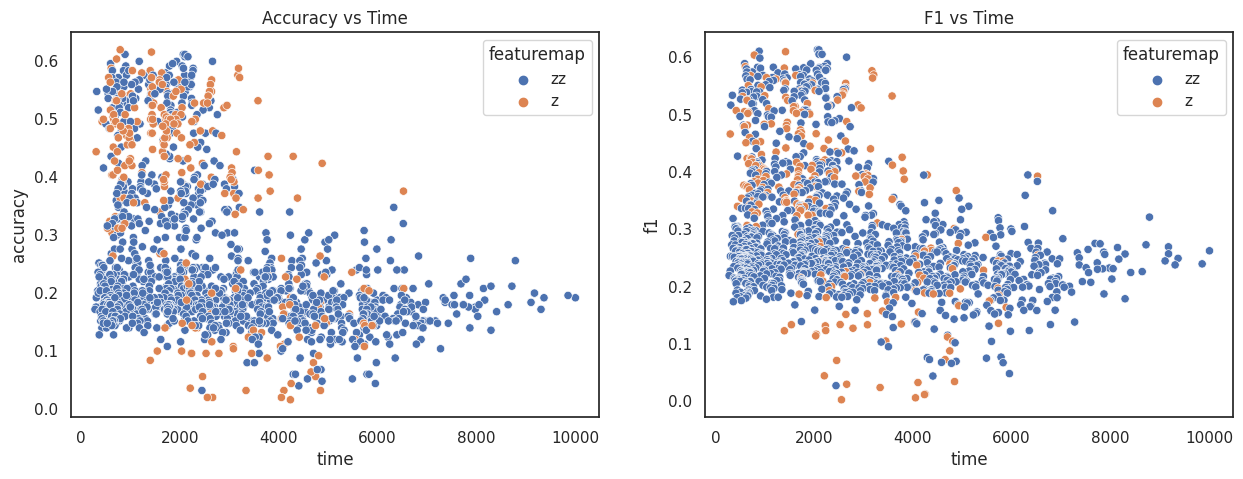

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [67]:
z_runtime = res[res['featuremap']=='z']['time']
zz_runtime = res[res['featuremap']=='zz']['time']

# significant differences in runtime
print("Z significantly shorter than ZZFeatureMap:", mannwhitneyu(z_runtime, zz_runtime, alternative='less').pvalue < 0.05)

Z significantly shorter than ZZFeatureMap: True


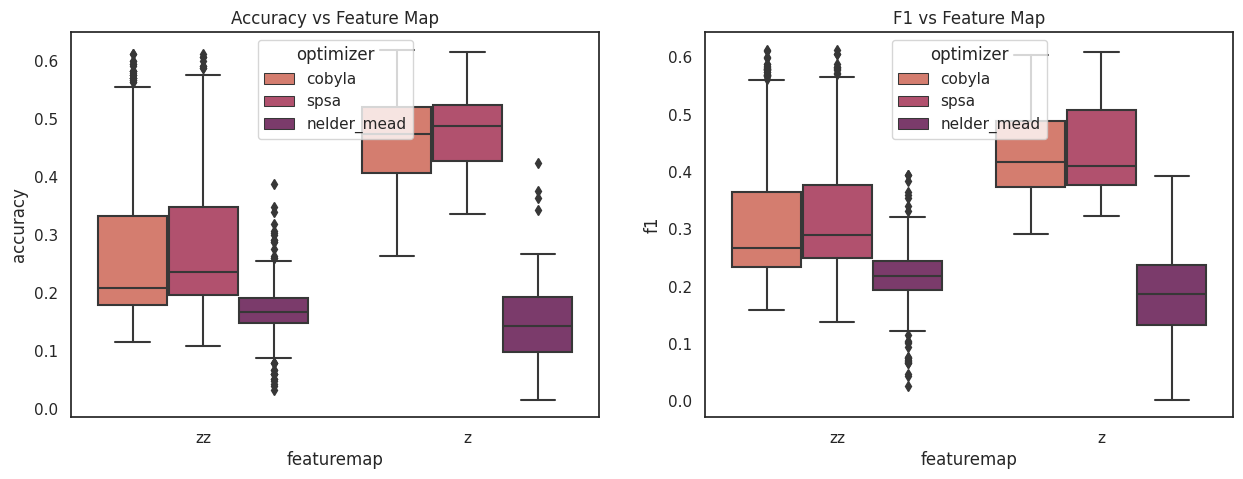

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

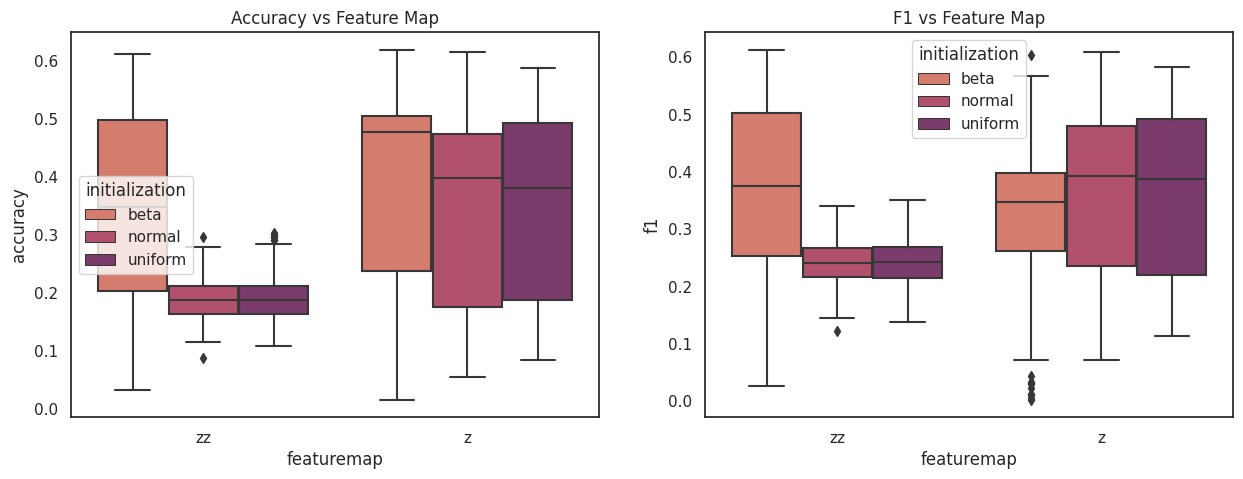

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

### Ansatz Entanglement

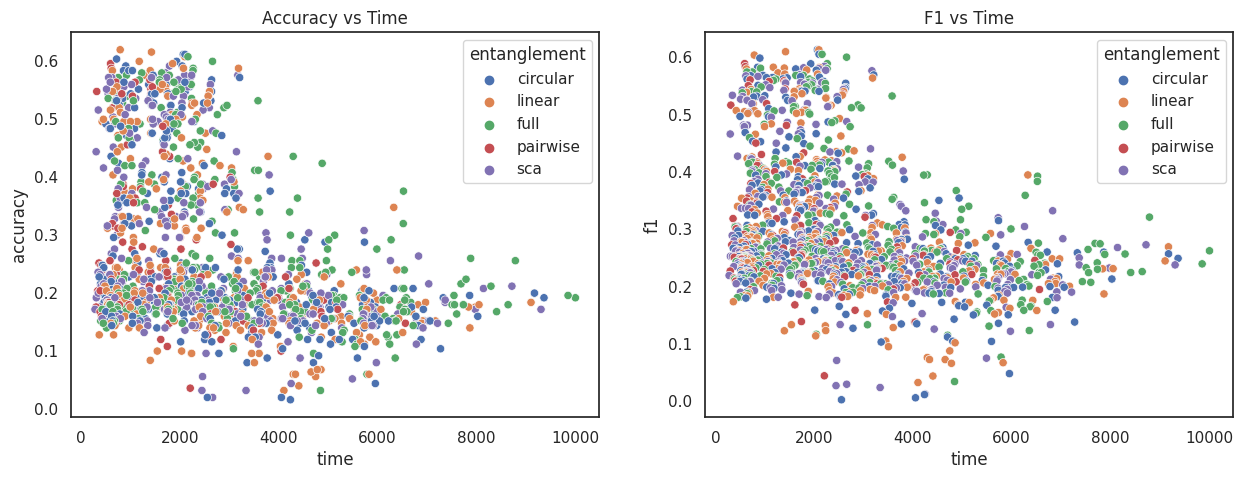

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [71]:
sca_runtime = res[res['entanglement']=='sca']['time']
full_runtime = res[res['entanglement']=='full']['time']
circular_runtime = res[res['entanglement']=='circular']['time']
linear_runtime = res[res['entanglement']=='linear']['time']
pairwise_runtime = res[res['entanglement']=='pairwise']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = mannwhitneyu(res[res['entanglement']==entanglement1]['time'], res[res['entanglement']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than sca True
pairwise: significantly shorter than full True
pairwise: significantly shorter than circular True
pairwise: significantly shorter than linear True


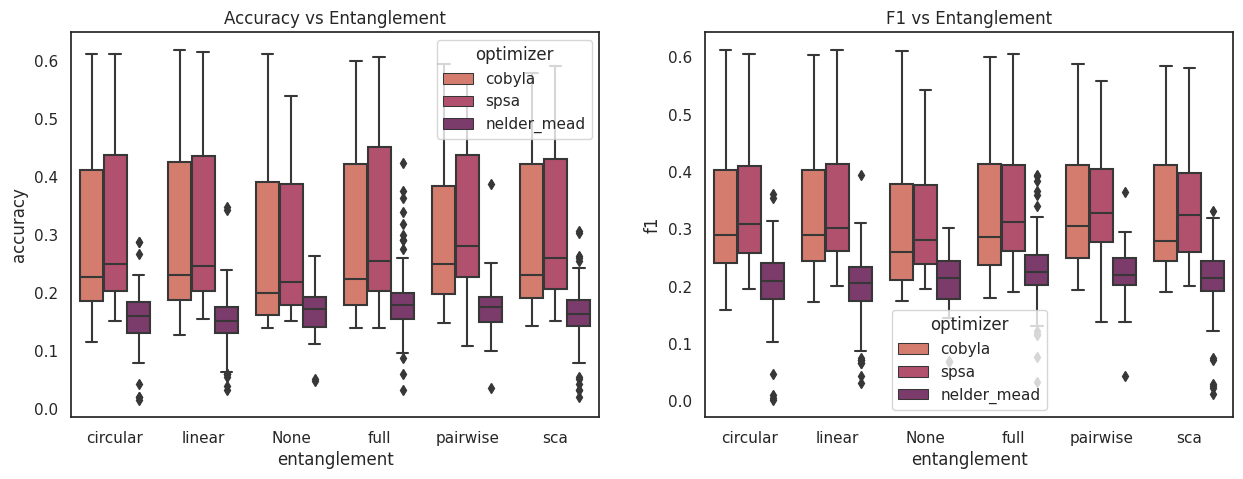

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

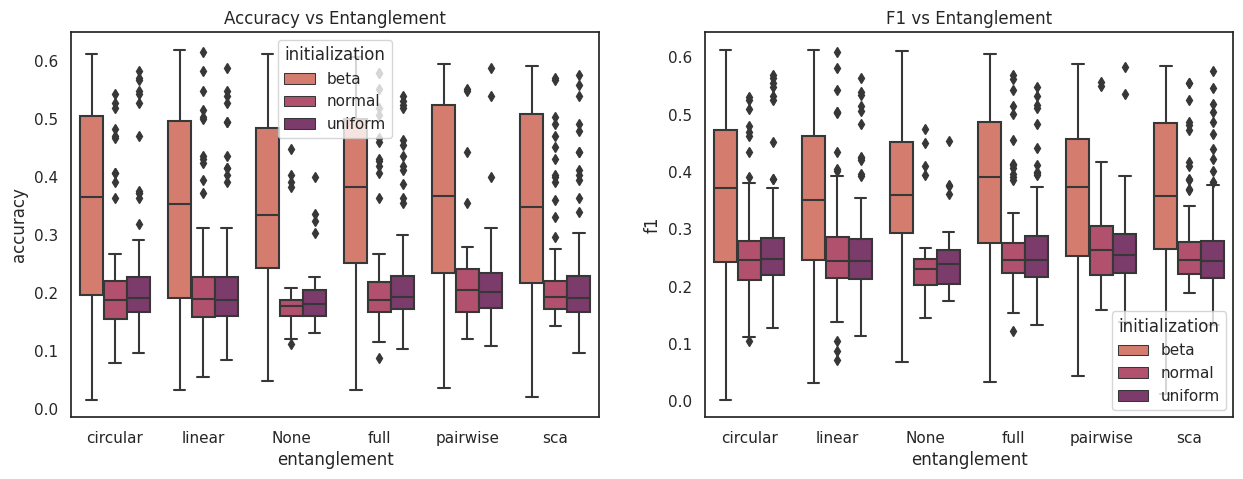

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

### FeatureMap Entanglement

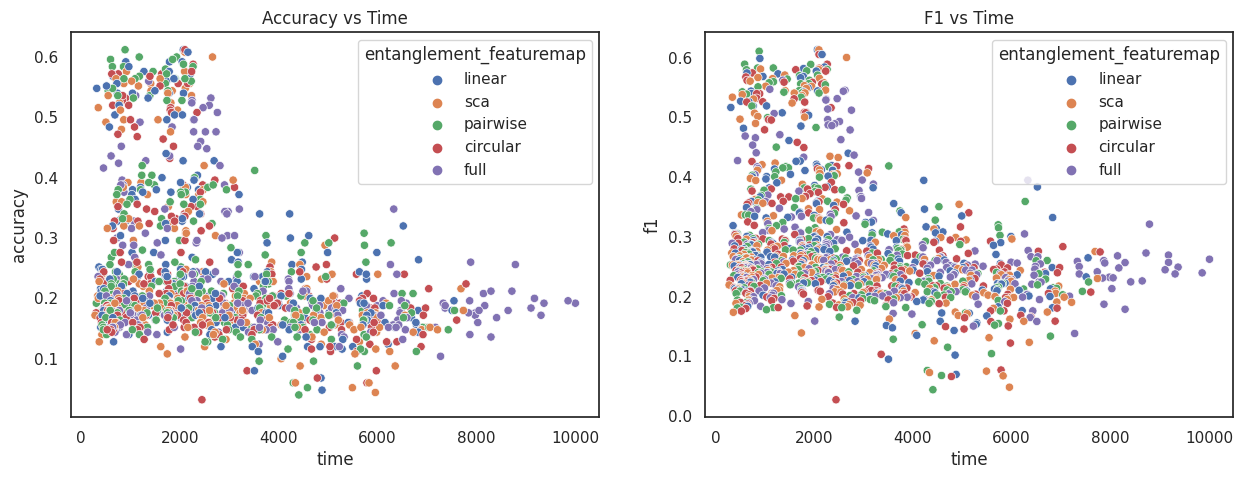

In [74]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement_featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement_featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [75]:
sca_runtime = res[res['entanglement_featuremap']=='sca'].set_index(index).sort_index()['time']
full_runtime = res[res['entanglement_featuremap']=='full'].set_index(index).sort_index()['time']
circular_runtime = res[res['entanglement_featuremap']=='circular'].set_index(index).sort_index()['time']
linear_runtime = res[res['entanglement_featuremap']=='linear'].set_index(index).sort_index()['time']
pairwise_runtime = res[res['entanglement_featuremap']=='pairwise'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = wilcoxon(res[res['entanglement_featuremap']==entanglement1]['time'], res[res['entanglement_featuremap']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
linear: significantly shorter than full True
pairwise: significantly shorter than full True


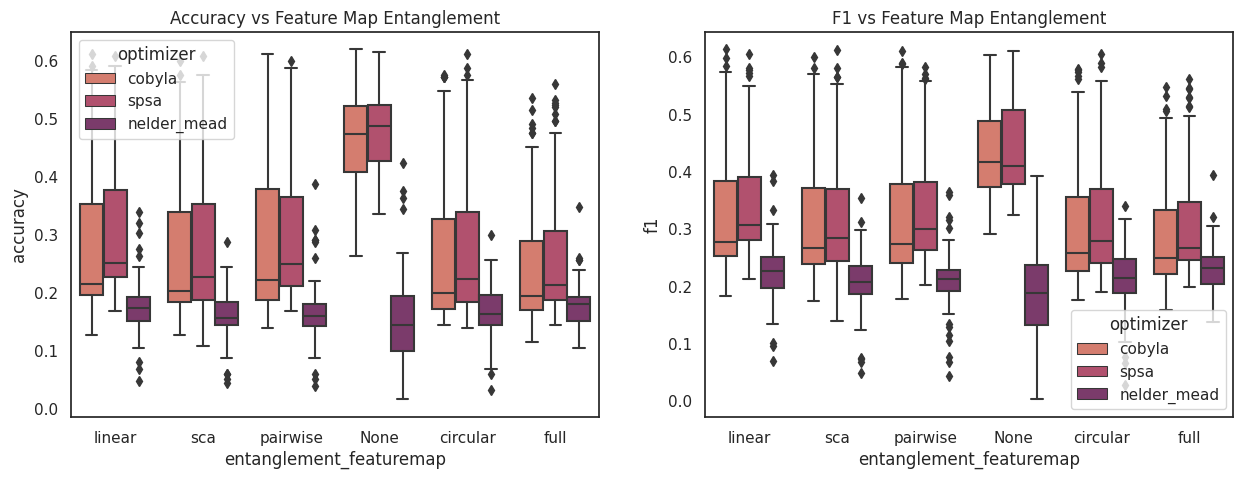

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


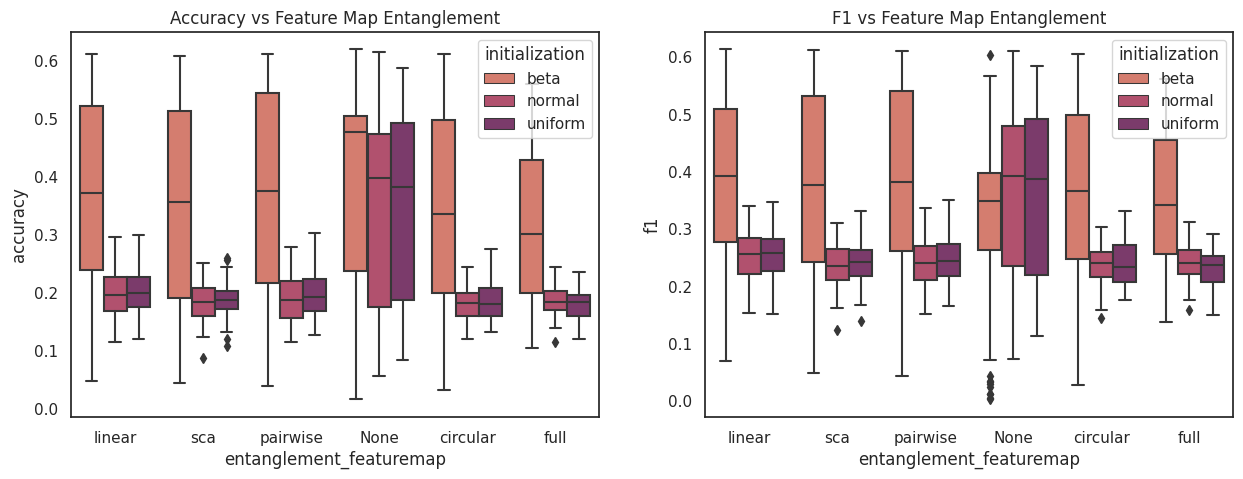

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


### Preprocessing

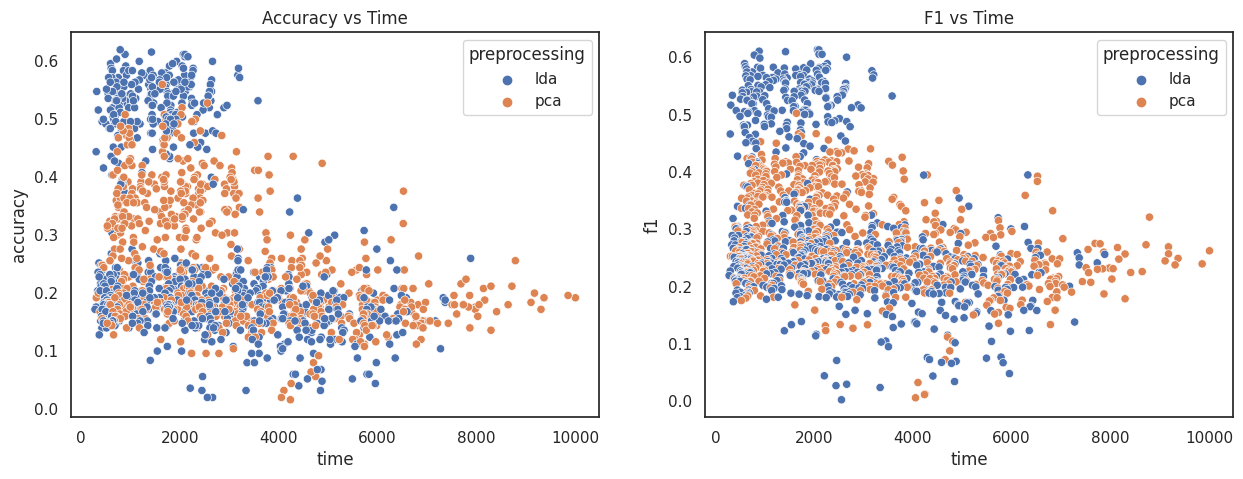

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='preprocessing', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='preprocessing', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [79]:
pca_runtime = res[res['preprocessing']=='pca'].set_index(index).sort_index()['time']
lda_runtime = res[res['preprocessing']=='lda'].set_index(index).sort_index()['time']

# significant differences in runtime
print("PCA significantly longer than LDA:", wilcoxon(pca_runtime, lda_runtime, alternative='greater').pvalue < 0.05)

PCA significantly longer than LDA: True


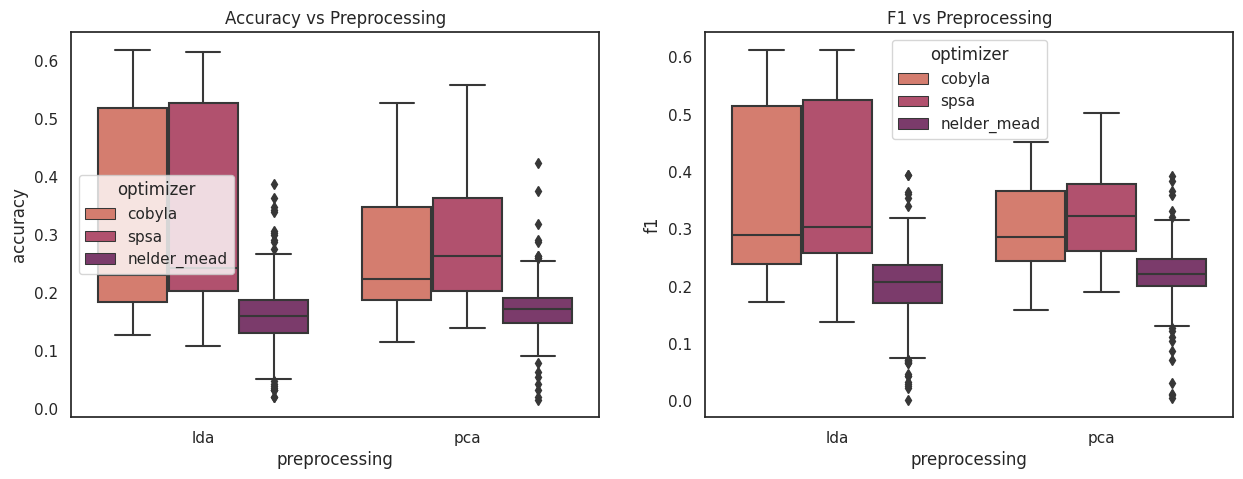

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

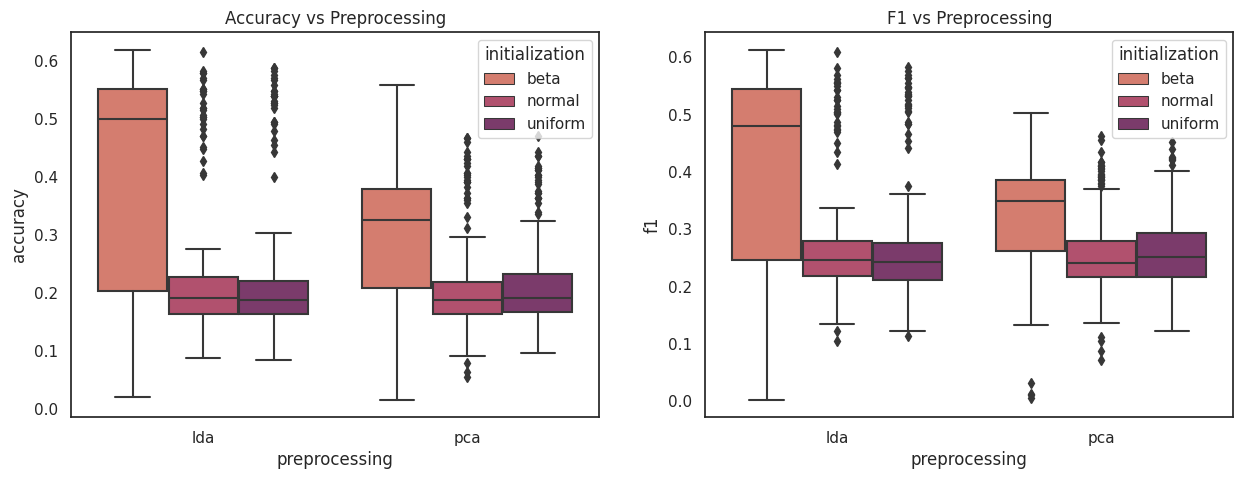

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

### Initialization

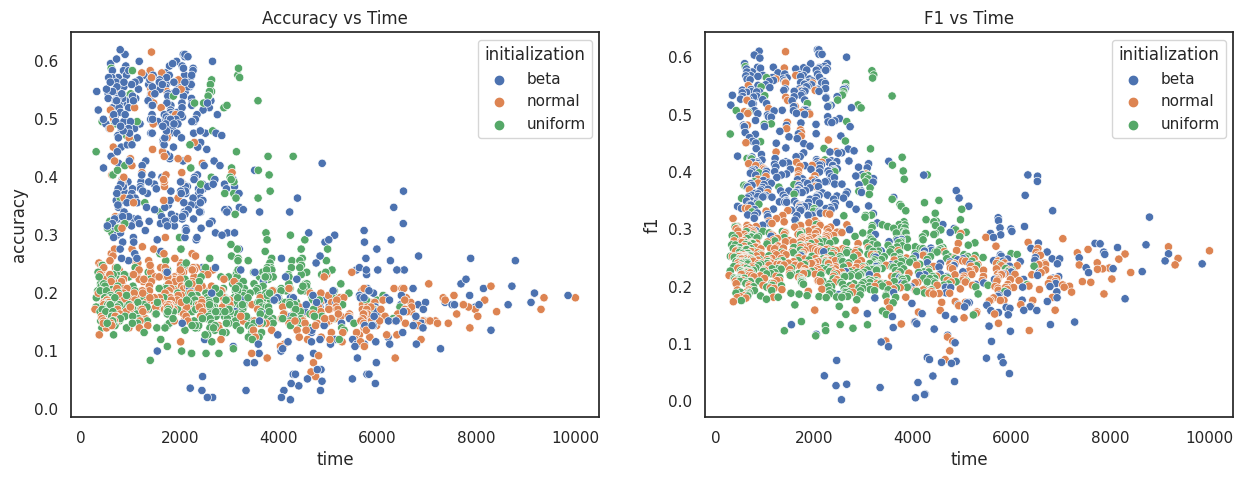

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [83]:
beta = res[res['initialization']=='beta'].set_index(index).sort_index()['time']
normal = res[res['initialization']=='normal'].set_index(index).sort_index()['time']
uniform = res[res['initialization']=='uniform'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(beta, normal, uniform).pvalue < 0.05)

print("Uniform significantly shorter than beta:", wilcoxon(uniform, beta, alternative='less').pvalue < 0.05)
print("Uniform significantly shorter than normal:", wilcoxon(uniform, normal, alternative='less').pvalue < 0.05)
print("Normal significantly shorter than beta:", wilcoxon(normal, beta, alternative='less').pvalue < 0.05)

Significant Differences: True
Uniform significantly shorter than beta: True
Uniform significantly shorter than normal: True
Normal significantly shorter than beta: True


In [84]:
res.groupby(['optimizer', 'initialization'])[['iterations', 'time']].mean()

iterations         time
optimizer   initialization                         
cobyla      beta            213.708333  1265.160183
            normal          163.529762   960.133417
            uniform         162.113095   942.429726
nelder_mead beta            934.101190  5302.451486
            normal          987.261905  5523.152514
            uniform         537.077381  3093.588415
spsa        beta            351.000000  1975.892600
            normal          351.000000  1968.991988
            uniform         651.000000  3666.888876

## Plot multiple variables

In [85]:
r = res_better.copy()
# replace all None with 'None'
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'

### Time vs. Hyperparameters

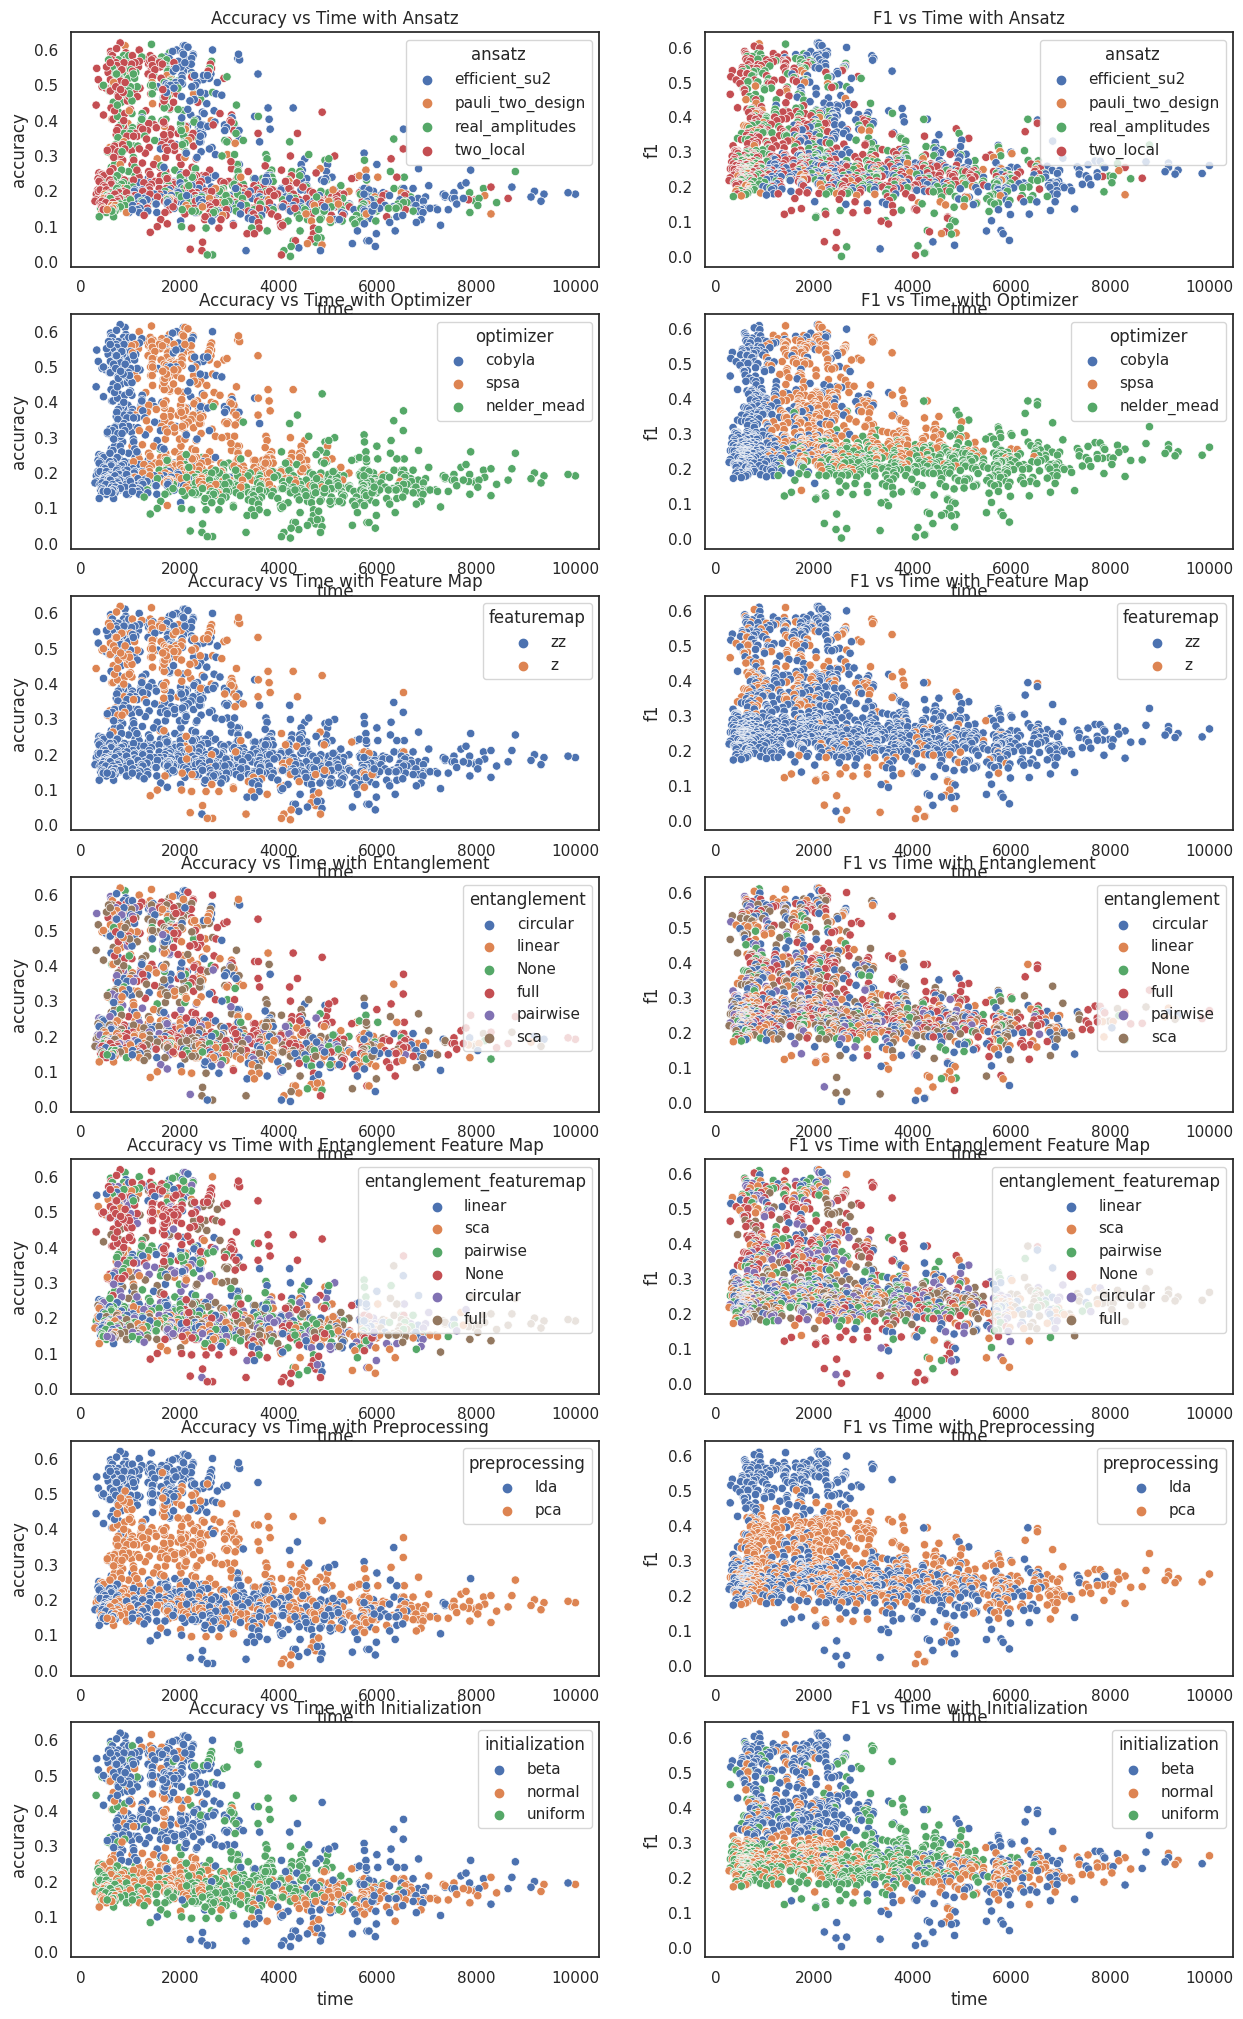

In [86]:
fig, ax = plt.subplots(7, 2, figsize=(15, 25))
sns.scatterplot(data=r, x='time', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement', palette='deep', ax=ax[3, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement', palette='deep', ax=ax[3, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[4, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement_featuremap', palette='deep', ax=ax[4, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='preprocessing', palette='deep', ax=ax[5, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='preprocessing', palette='deep', ax=ax[5, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='initialization', palette='deep', ax=ax[6, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='initialization', palette='deep', ax=ax[6, 1])
ax[0, 0].set_title('Accuracy vs Time with Ansatz')
ax[0, 1].set_title('F1 vs Time with Ansatz')
ax[2, 0].set_title('Accuracy vs Time with Feature Map')
ax[2, 1].set_title('F1 vs Time with Feature Map')
ax[3, 0].set_title('Accuracy vs Time with Entanglement')
ax[3, 1].set_title('F1 vs Time with Entanglement')
ax[4, 0].set_title('Accuracy vs Time with Entanglement Feature Map')
ax[4, 1].set_title('F1 vs Time with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Time with Optimizer')
ax[1, 1].set_title('F1 vs Time with Optimizer')
ax[5, 0].set_title('Accuracy vs Time with Preprocessing')
ax[5, 1].set_title('F1 vs Time with Preprocessing')
ax[6, 0].set_title('Accuracy vs Time with Initialization')
ax[6, 1].set_title('F1 vs Time with Initialization')
plt.show()

### Ansatz vs Accuracy/Time and additional parameters

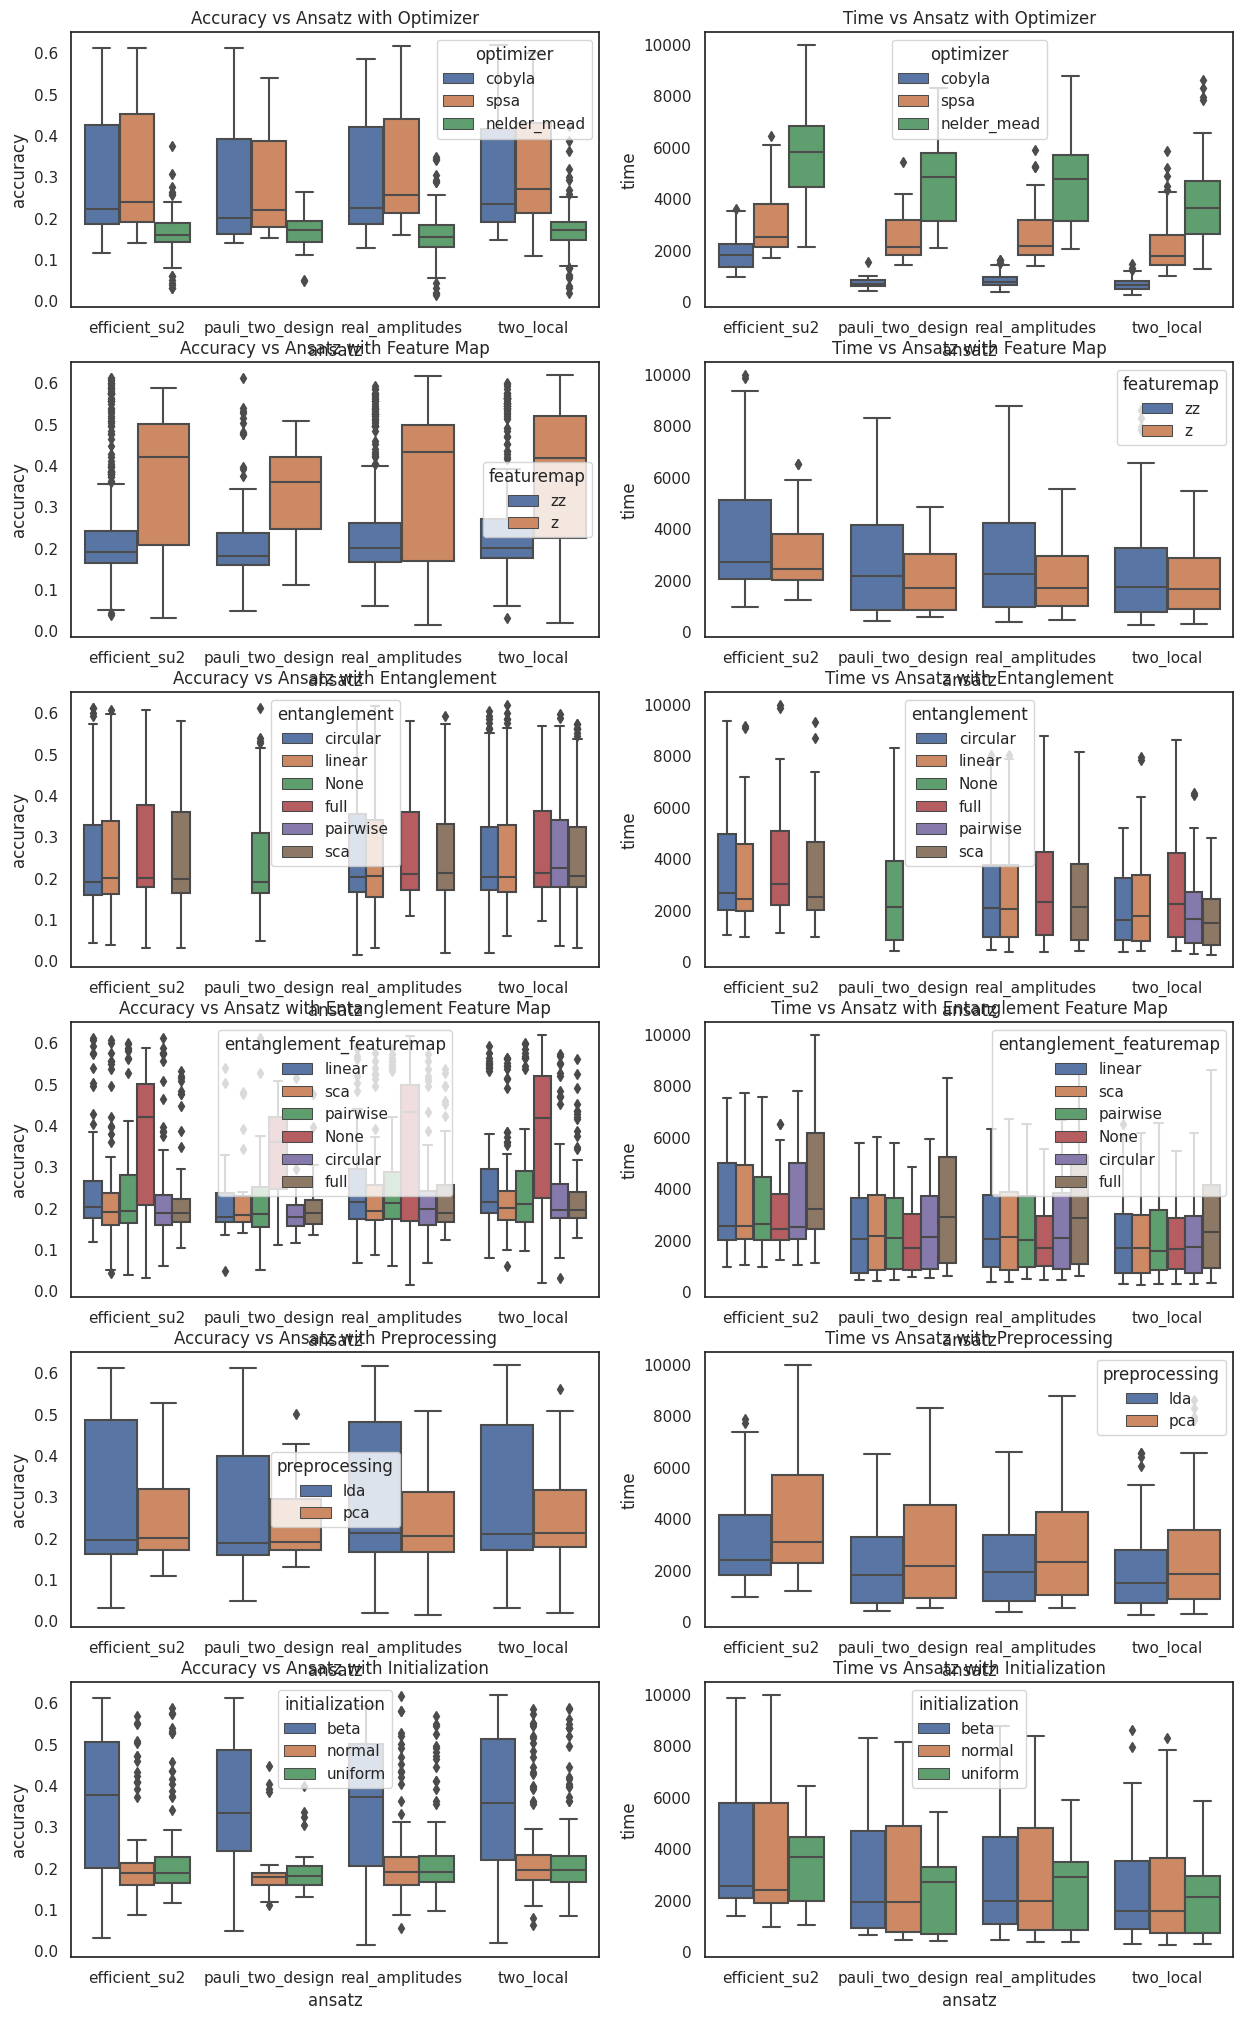

In [87]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='featuremap', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='featuremap', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='optimizer', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='optimizer', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[1, 0].set_title('Accuracy vs Ansatz with Feature Map')
ax[1, 1].set_title('Time vs Ansatz with Feature Map')
ax[2, 0].set_title('Accuracy vs Ansatz with Entanglement')
ax[2, 1].set_title('Time vs Ansatz with Entanglement')
ax[3, 0].set_title('Accuracy vs Ansatz with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Ansatz with Entanglement Feature Map')
ax[0, 0].set_title('Accuracy vs Ansatz with Optimizer')
ax[0, 1].set_title('Time vs Ansatz with Optimizer')
ax[4, 0].set_title('Accuracy vs Ansatz with Preprocessing')
ax[4, 1].set_title('Time vs Ansatz with Preprocessing')
ax[5, 0].set_title('Accuracy vs Ansatz with Initialization')
ax[5, 1].set_title('Time vs Ansatz with Initialization')
plt.show()


### FeatureMap vs. Accuracy/Time and additional parameters

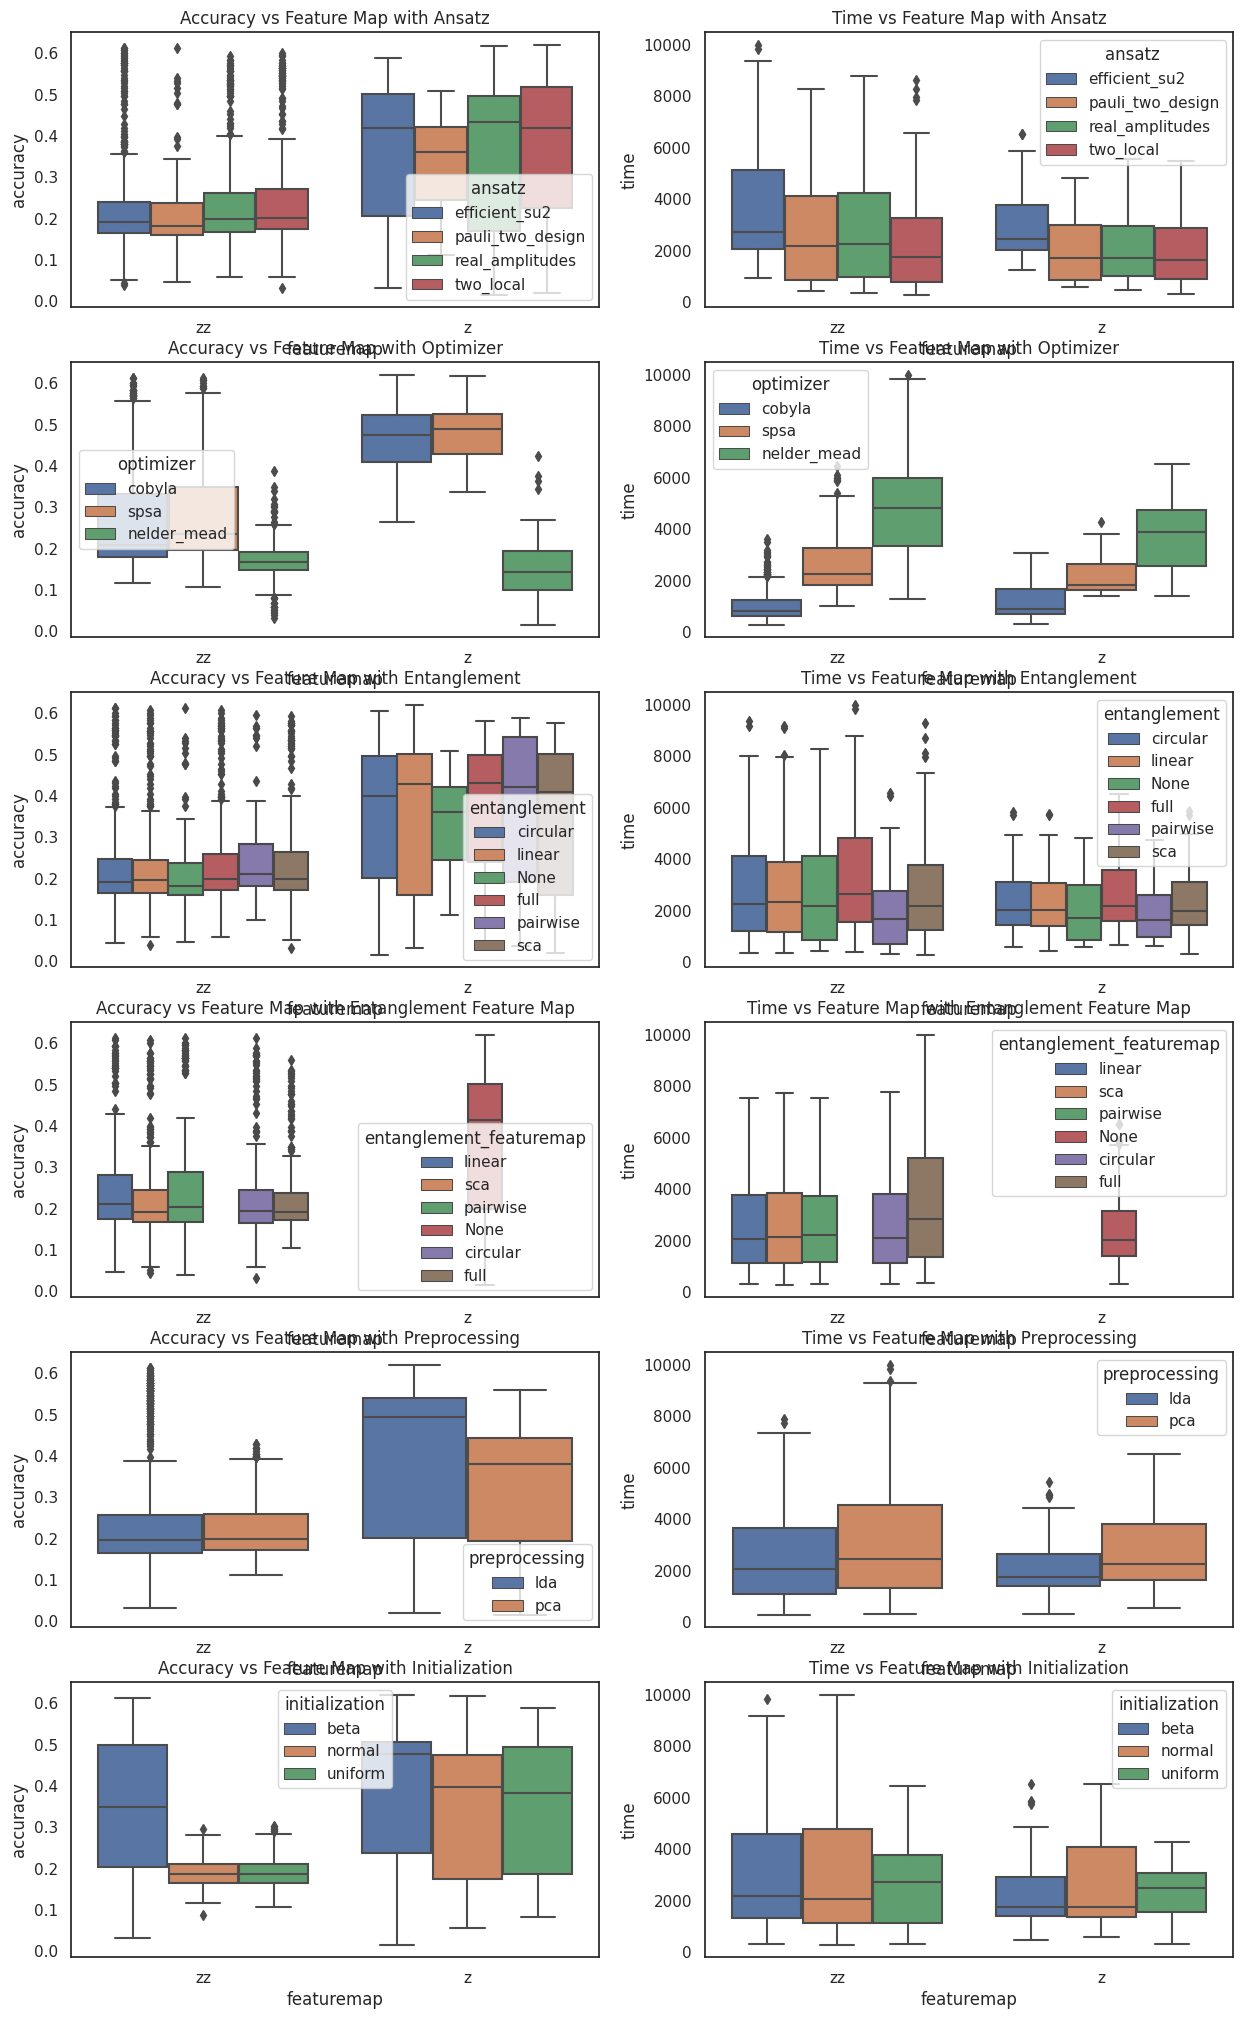

In [88]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map with Ansatz')
ax[0, 1].set_title('Time vs Feature Map with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map with Entanglement')
ax[2, 1].set_title('Time vs Feature Map with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Feature Map with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map with Optimizer')
ax[1, 1].set_title('Time vs Feature Map with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map with Initialization')
ax[5, 1].set_title('Time vs Feature Map with Initialization')
plt.show()

### Entanglement vs Accuracy/Time and additional parameters

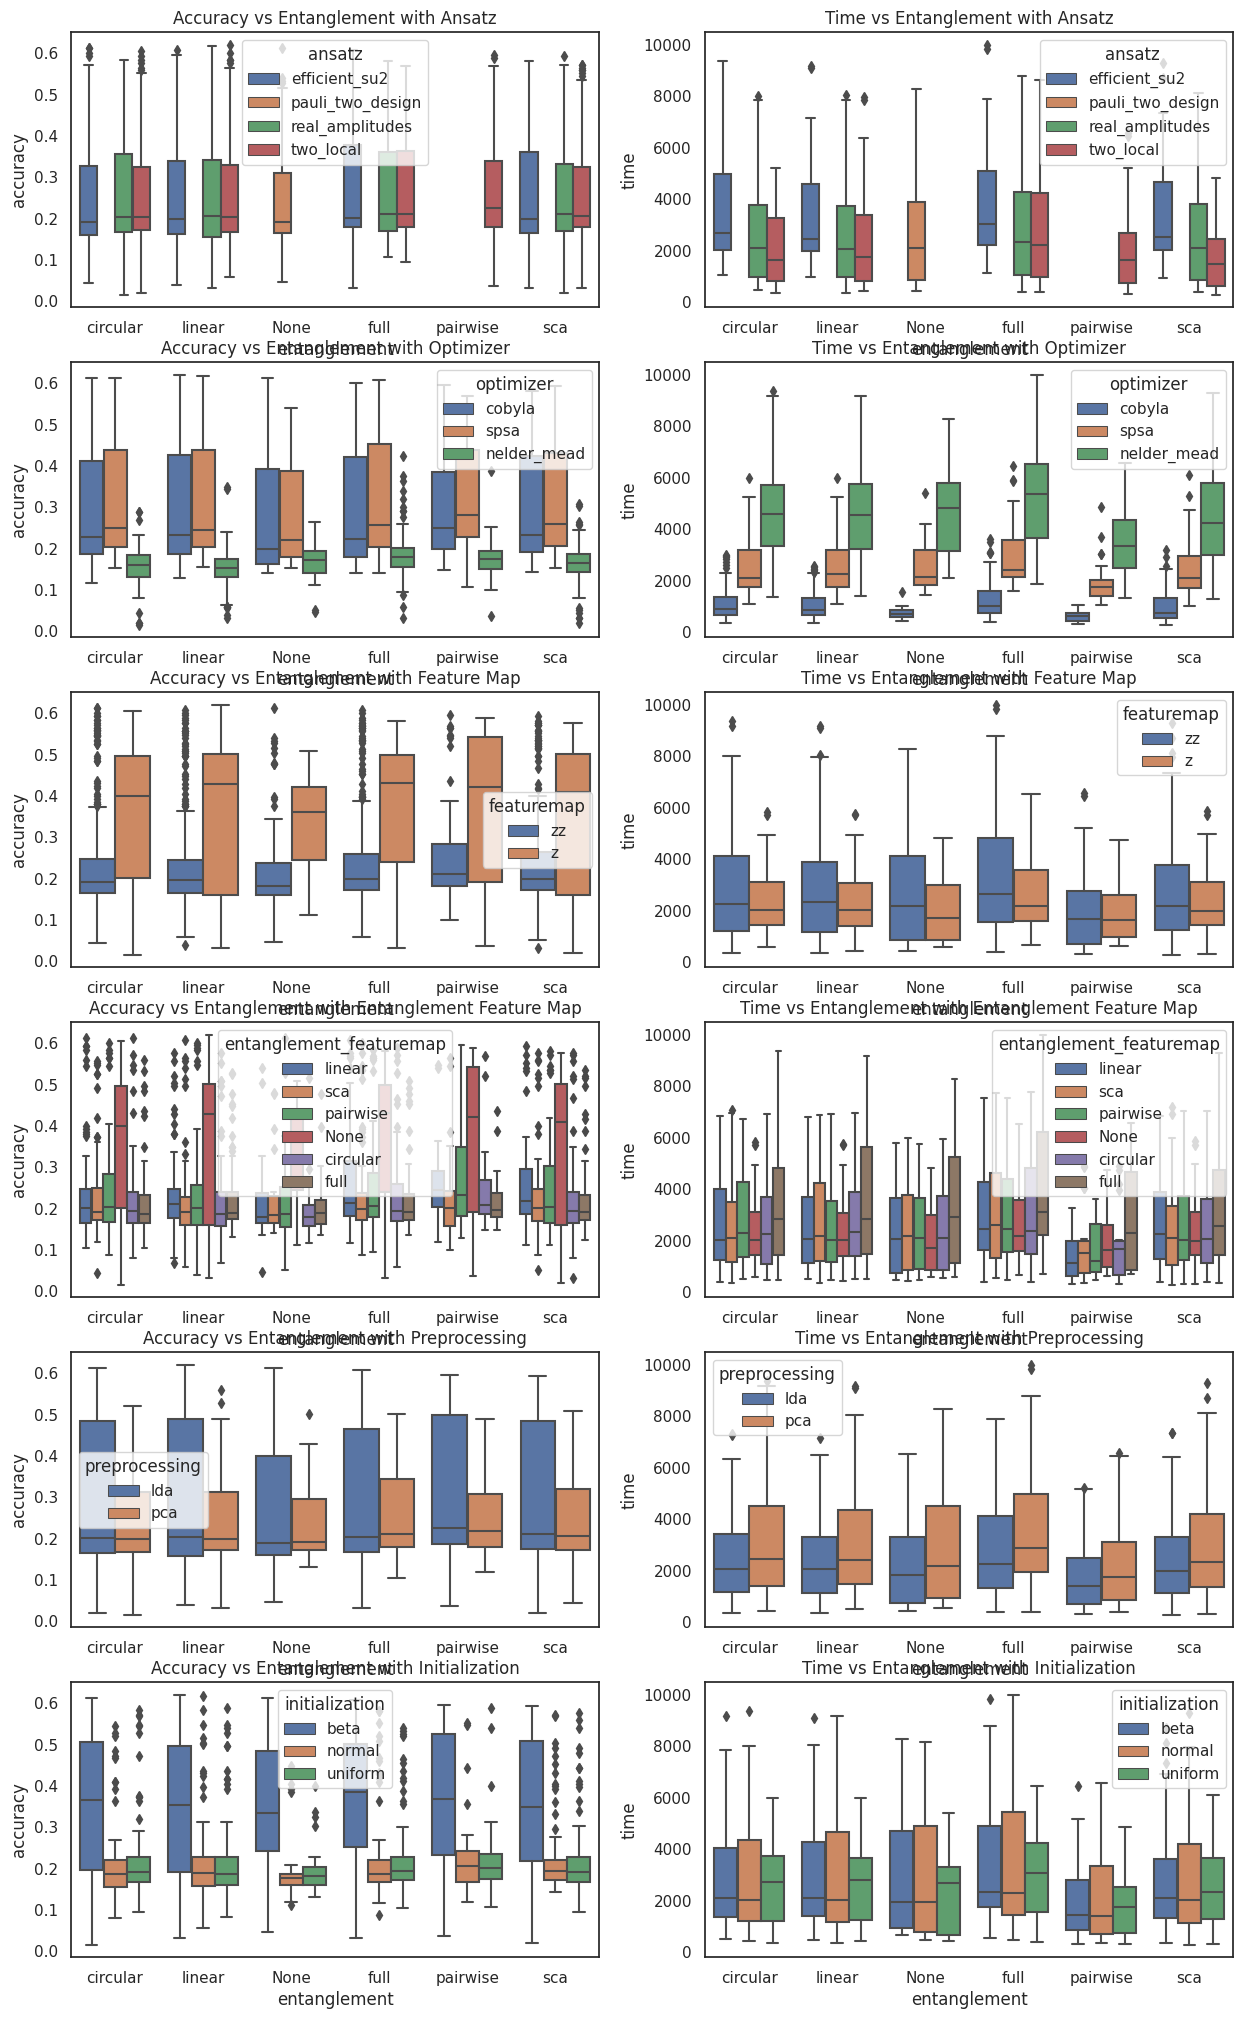

In [89]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Entanglement with Feature Map')
ax[2, 1].set_title('Time vs Entanglement with Feature Map')
ax[3, 0].set_title('Accuracy vs Entanglement with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Entanglement with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Entanglement with Initialization')
ax[5, 1].set_title('Time vs Entanglement with Initialization')
plt.show()


### FeatureMap Entanglement vs. Accuracy/Time and additional parameters

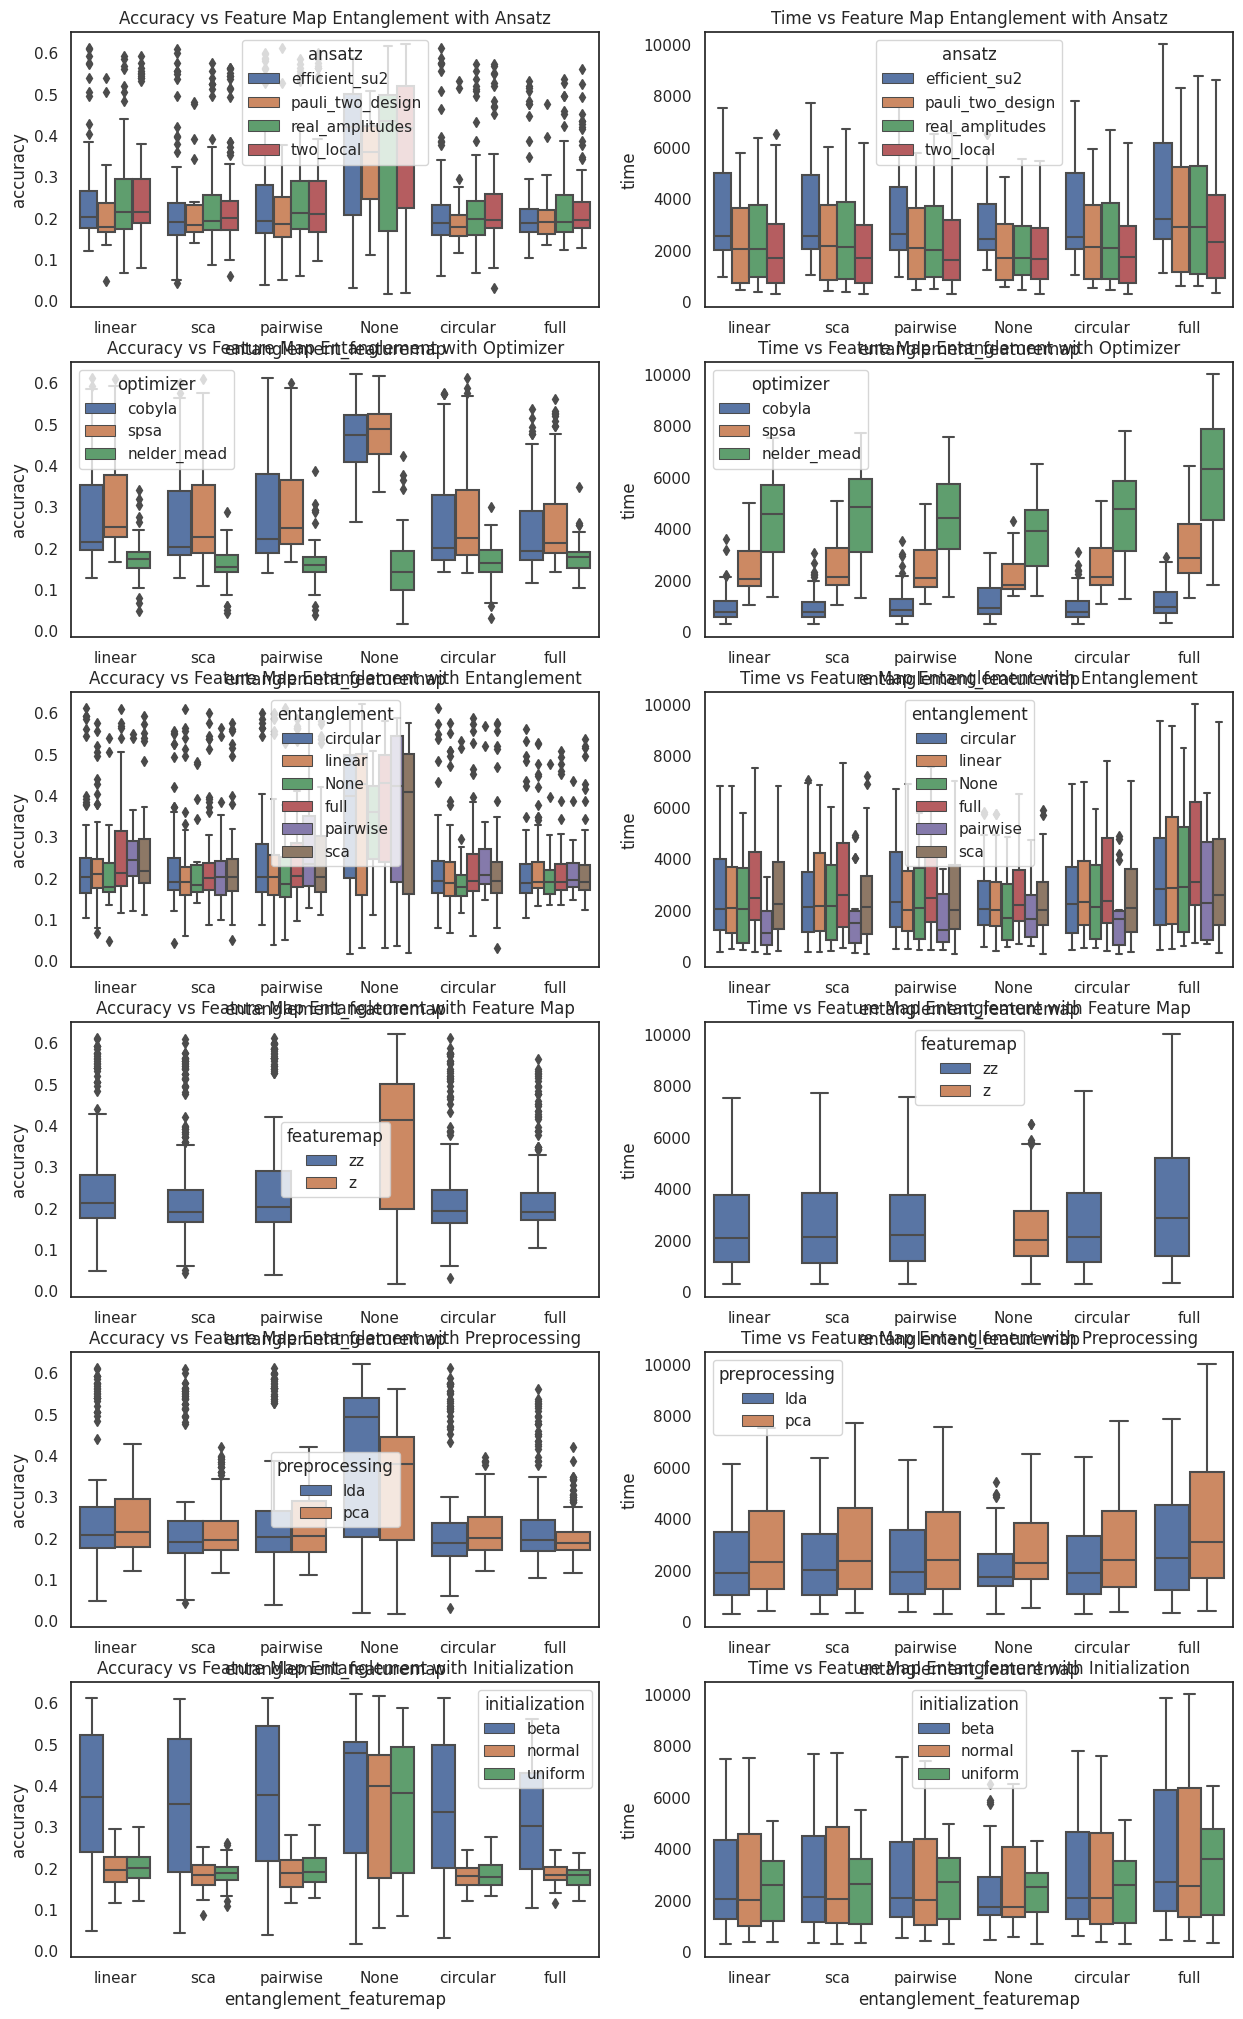

In [90]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Feature Map Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map Entanglement with Entanglement')
ax[2, 1].set_title('Time vs Feature Map Entanglement with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map Entanglement with Feature Map')
ax[3, 1].set_title('Time vs Feature Map Entanglement with Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Feature Map Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map Entanglement with Initialization')
ax[5, 1].set_title('Time vs Feature Map Entanglement with Initialization')
plt.show()

## Analyze Worst
* Only Nelson-Mead and (few) SPSA configurations
* A lot of ZFeatureMap, compared to ZZ
* More LDA than PCA ones

In [91]:
worst.groupby(['optimizer'])['accuracy'].count()/res.groupby(['optimizer'])['accuracy'].count()

optimizer
cobyla              NaN
nelder_mead    0.115079
spsa           0.001984
Name: accuracy, dtype: float64

In [92]:
worst.groupby(['ansatz'])['accuracy'].count()/res.groupby(['ansatz'])['accuracy'].count()

ansatz
efficient_su2       0.034722
pauli_two_design    0.027778
real_amplitudes     0.046296
two_local           0.038889
Name: accuracy, dtype: float64

In [93]:
worst.groupby(['featuremap'])['accuracy'].count()/res.groupby(['featuremap'])['accuracy'].count()

featuremap
z     0.111111
zz    0.024603
Name: accuracy, dtype: float64

In [94]:
worst.groupby(['entanglement'])['accuracy'].count()/res.groupby(['entanglement'])['accuracy'].count()

entanglement
circular    0.043210
full        0.024691
linear      0.061728
pairwise    0.027778
sca         0.033951
Name: accuracy, dtype: float64

In [95]:
worst.groupby(['ansatz', 'entanglement'])['accuracy'].count()/res.groupby(['ansatz', 'entanglement'])['accuracy'].count()

ansatz           entanglement
efficient_su2    circular        0.037037
                 full            0.037037
                 linear          0.027778
                 sca             0.037037
real_amplitudes  circular        0.046296
                 full            0.018519
                 linear          0.083333
                 sca             0.037037
two_local        circular        0.046296
                 full            0.018519
                 linear          0.074074
                 pairwise        0.027778
                 sca             0.027778
Name: accuracy, dtype: float64

In [96]:
worst.groupby(['entanglement_featuremap'])['accuracy'].count()/res.groupby(['entanglement_featuremap'])['accuracy'].count()

entanglement_featuremap
circular    0.027778
full        0.003968
linear      0.019841
pairwise    0.031746
sca         0.039683
Name: accuracy, dtype: float64

In [97]:
worst.groupby(['preprocessing'])['accuracy'].count()/res.groupby(['preprocessing'])['accuracy'].count()

preprocessing
lda    0.056878
pca    0.021164
Name: accuracy, dtype: float64

In [98]:
worst.groupby(['initialization'])['accuracy'].count()/res.groupby(['initialization'])['accuracy'].count()

initialization
beta       0.081349
normal     0.019841
uniform    0.015873
Name: accuracy, dtype: float64

# Plot

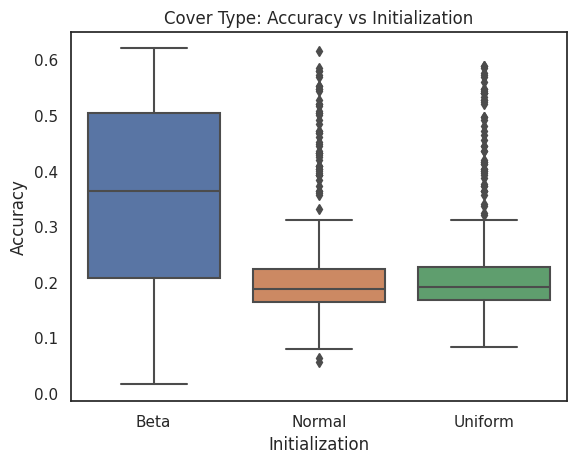

In [99]:
sns.boxplot(data=res, x='initialization', y='accuracy', palette='deep', order=['beta', 'normal', 'uniform'])
plt.title('Cover Type: Accuracy vs Initialization')
plt.ylabel("Accuracy")
plt.xlabel("Initialization")
plt.xticks([0,1,2], ['Beta', 'Normal', 'Uniform'])
plt.savefig("../reports/figures/covtype_init.png", bbox_inches='tight')
plt.show()

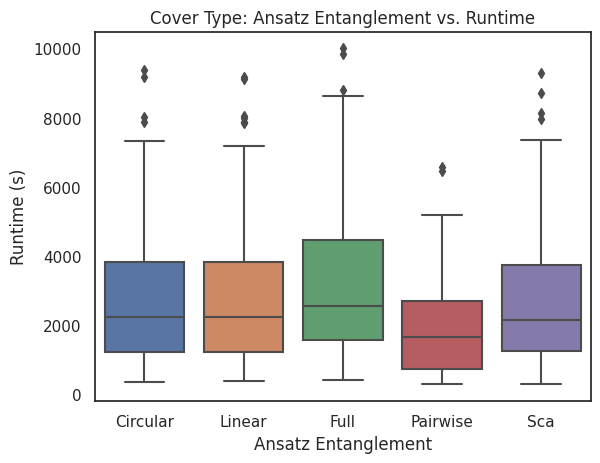

In [100]:
sns.boxplot(data=res, x='entanglement', y='time', palette='deep', order=['circular', 'linear', 'full', 'pairwise', 'sca'])
plt.title("Cover Type: Ansatz Entanglement vs. Runtime")
plt.xlabel("Ansatz Entanglement")
plt.ylabel("Runtime (s)")
plt.xticks([0, 1, 2, 3, 4], ['Circular', 'Linear', 'Full', 'Pairwise', 'Sca'])
plt.savefig("../reports/figures/covtype_entanglement_time.png", bbox_inches='tight')
plt.show()

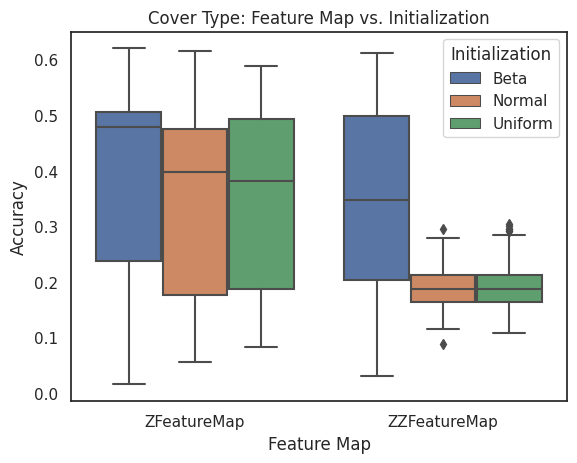

In [101]:
sns.boxplot(data=res, x='featuremap', y='accuracy', hue='initialization', palette='deep', order=['z', 'zz'], hue_order=['beta', 'normal', 'uniform'])
plt.title("Cover Type: Feature Map vs. Initialization")
plt.xlabel("Feature Map")
plt.ylabel("Accuracy")
plt.xticks([0, 1], ['ZFeatureMap', 'ZZFeatureMap'])
legend = plt.legend(title="Initialization")
for label in legend.get_texts():
    if label.get_text() == 'uniform':
        label.set_text('Uniform')
    else:
        label.set_text(label.get_text().capitalize())
plt.savefig("../reports/figures/covtype_featuremap_init.png", bbox_inches='tight')
plt.show()

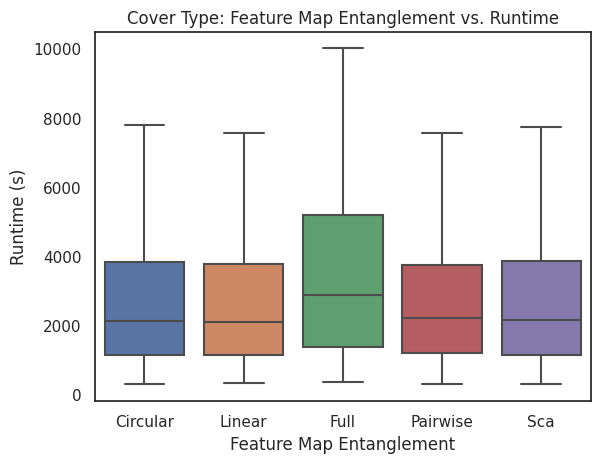

In [102]:
sns.boxplot(data=res, x='entanglement_featuremap', y='time', palette='deep', order=['circular', 'linear', 'full', 'pairwise', 'sca'])
plt.title("Cover Type: Feature Map Entanglement vs. Runtime")
plt.xlabel("Feature Map Entanglement")
plt.ylabel("Runtime (s)")
plt.xticks([0, 1, 2, 3, 4], ['Circular', 'Linear', 'Full', 'Pairwise', 'Sca'])
plt.savefig("../reports/figures/covtype_featuremap_ent_runtime.png", bbox_inches='tight')
plt.show()